# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accururacy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd


def dataFromNpz(traindata, trainlabels):
  for i in range(len(trainlabels)):
    if trainlabels[i] == -1:
      trainlabels[i] = trainlabels[i]+1
  trainlabels = trainlabels.astype(int)
  traindata = traindata.astype(float)
  dataset = np.column_stack((traindata, trainlabels))
  dataset = dataset.tolist()
  for i in range(len(dataset)):
    dataset[i][len(dataset[0])-1] = int(dataset[i][len(dataset[0])-1])
  return dataset


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [4]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here
def linKernel(X, Y):
    K = np.matmul(X, Y.T)
    return K

def polyKernel(X, Y, kernel_param, bias):
    K = bias + np.matmul(X, Y.T)
    K = np.power(K, kernel_param)
    return K

def sigmoid(u):
  if u <=  -100:
    return 0
  if u >=  100:
    return 1
  K = 1/(1+np.exp(-u))
  return K

def train_pred_logistic_regression(X, Y, kernel = 'linear', reg_param = 0., kernel_param = 1., num_iter_gd = 100):
    n = X.shape[0]
    K = np.zeros([n, n])
    if kernel   ==    'poly':
      K = polyKernel(X, X, kernel_param, 1)
    elif kernel   ==    'rbf':
      for i in range(n):
        for j in range(n):
          K[i, j] = np.exp(0 - kernel_param*np.linalg.norm(X[i] - X[j])**2)
    elif kernel   ==    'linear':
      K = linKernel(X, X)

    alpha = np.random.randn(n, 1)
    rateOfLearning = 0.01

    for j in range(num_iter_gd):
      variable1 = 0
      for i in range(n):
        s = -np.dot(alpha.T, K[:, i]) * Y[i]
        variable1 = variable1 + (-Y[i] * K[:, i]) * sigmoid(s)
      gradient = reg_param * np.dot(K, alpha) + variable1.reshape(-1, 1)
      alpha -=  rateOfLearning * gradient
    return alpha


def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    trainN = train_X.shape[0]
    testN = test_X.shape[0]
    K = np.zeros([trainN, testN])
    if kernel   ==    'poly':
      K = polyKernel(train_X, test_X, kernel_param, 1)
    elif kernel   ==    'rbf':
      for i in range(trainN):
        for j in range(testN):
          K[i, j] = np.exp(-kernel_param * np.linalg.norm(train_X[i] - test_X[j]) ** 2)
    elif kernel   ==    'linear':
      K = linKernel(train_X, test_X)

    Y_prediction = np.sign(alpha.T@K)
    Y_prediction = Y_prediction.reshape(-1, 1)

    return Y_prediction

In [5]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 
dataset = np.load("dataset_A.npz")

lin_kernel_error_trainor = np.zeros(4)
lin_kernel_error_testor = np.zeros(4)
poly_kernel_error_trainor = np.zeros(4)
poly_kernel_error_testor = np.zeros(4)
rbf_kernel_error_trainor = np.zeros(4)
rbf_kernel_error_testor = np.zeros(4)
X_train, Y_train, X_test, Y_test = (dataset["arr_0"],dataset["arr_1"],dataset["arr_2"],dataset["arr_3"],)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "linear", reg_param = 1e-4, kernel_param = 1, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[0] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[0] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "poly", reg_param = 1e-3, kernel_param = 3, num_iter_gd = 100)
Y_prediction = test_pred(
alpha, X_train, Y_train, X_test, kernel = "poly", kernel_param = 3)
lin_kernel_error_testor[0] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "poly", kernel_param = 3)
poly_kernel_error_trainor[0] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "rbf", reg_param = 1e-4, kernel_param = 1, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "rbf", kernel_param = 1)
rbf_kernel_error_testor[0] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "rbf", kernel_param = 1)
rbf_kernel_error_trainor[0] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)

dataset = np.load("dataset_B.npz")
X_train, Y_train, X_test, Y_test = (dataset["arr_0"],dataset["arr_1"],dataset["arr_2"],dataset["arr_3"],)
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "linear", reg_param = 1, kernel_param = 1, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[1] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[1] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "poly", reg_param = 1e-3, kernel_param = 2, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "poly", kernel_param = 2)
lin_kernel_error_testor[1] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "poly", kernel_param = 2)
poly_kernel_error_trainor[1] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "rbf", reg_param = 1e-3, kernel_param = 4, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "rbf", kernel_param = 4)
rbf_kernel_error_testor[1] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(
alpha, X_train, Y_train, X_train, kernel = "rbf", kernel_param = 4)
rbf_kernel_error_trainor[1] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)

dataset = np.load("dataset_C.npz")
X_train, Y_train, X_test, Y_test = (dataset["arr_0"],dataset["arr_1"],dataset["arr_2"],dataset["arr_3"],)
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "linear", reg_param = 1e-4, kernel_param = 1, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[2] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[2] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "poly", reg_param = 1e-4, kernel_param = 1e-4, num_iter_gd = 100)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "poly", kernel_param = 1e-4)
lin_kernel_error_testor[2] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "poly", kernel_param = 1e-4)
poly_kernel_error_trainor[2] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "rbf", reg_param = 1e-4, kernel_param = 1e-3, num_iter_gd = 300)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "rbf", kernel_param = 1e-3)
rbf_kernel_error_testor[2] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(
alpha, X_train, Y_train, X_train, kernel = "rbf", kernel_param = 1e-3)
rbf_kernel_error_trainor[2] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)

dataset = np.load("dataset_D.npz")
X_train, Y_train, X_test, Y_test = (dataset["arr_0"],dataset["arr_1"],dataset["arr_2"],dataset["arr_3"],)
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "linear", reg_param = 1e-4, kernel_param = 1, num_iter_gd = 300)
Y_prediction = test_pred(
alpha, X_train, Y_train, X_test, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[3] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(
alpha, X_train, Y_train, X_train, kernel = "linear", kernel_param = 1)
lin_kernel_error_trainor[3] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "poly", reg_param = 1e-4, kernel_param = 1e-4, num_iter_gd = 300)
Y_prediction = test_pred(
alpha, X_train, Y_train, X_test, kernel = "poly", kernel_param = 1e-4)
lin_kernel_error_testor[3] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "poly", kernel_param = 1e-4)
poly_kernel_error_trainor[3] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = "rbf", reg_param = 1e-4, kernel_param = 1e-2, num_iter_gd = 300)
Y_prediction = test_pred(alpha, X_train, Y_train, X_test, kernel = "rbf", kernel_param = 1e-2)
rbf_kernel_error_testor[3] = 1 - len(Y_test[Y_test   ==    Y_prediction]) / len(Y_test)
Y_prediction = test_pred(alpha, X_train, Y_train, X_train, kernel = "rbf", kernel_param = 1e-2)
rbf_kernel_error_trainor[3] = 1 - len(Y_train[Y_train   ==    Y_prediction]) / len(Y_train)


/var/folders/nl/1mt3vbv178l4wkfxkw9dfjq00000gn/T/ipykernel_33104/3134434188.py:42: RuntimeWarning: invalid value encountered in subtract
  alpha -=  rateOfLearning * gradient


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

LR-Linear Kernel :

Dataset | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 0.0001 | 16.6 | 16
B | 1 | 18 | 20.5
C | 0.0001 | 50.3 | 43.3
D | 0.0001 | 43.2 | 23

LR-Polynomial kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 3 | 0.001 | 14 | 14.4
B |2 | 0.001 | 15.3 | 16
C |0.0001 | 0.0001 | 49.5 | 48.5
D |0.0001 | 0.0001 | 43.5 | 23

LR-Rbf kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 1 | 0.0001 | 0.3 | 0.6
B | 4 | 0.001 | 15.3 | 17
C | 0.001 | 0.0001 | 0 | 2.5
D | 0.01 | 0.0001 | 0 | 8.5

**Inference on Datasets** :
1) To separate classes in Dataset A, we need a non-linear decision boundary. For this reason, rbf kernel gives small train & test errors. As for polynomial kernel, odd kernels performed better over even kernels, indicating an odd function boundary requirement. Linear kernel perofrms worse due to the same non-linear decision boundary requirement.

2) To separate classes in Dataset B, we need a linear decision boundary, and polynomial of 1st degree is better relative to higher degrees. All show almost same performance, as data had a mix of differnet classes.

3) To separate classes in Dataset C, we need a non-linear decision boundary, Linear and polynomial shown similar results, with rbf better than the other.

4) To separate classes in Dataset D, Linear and polynomial shown similar results, RBF kernel performed the best, with training 0-1 error 0.



<Figure size 640x480 with 0 Axes>

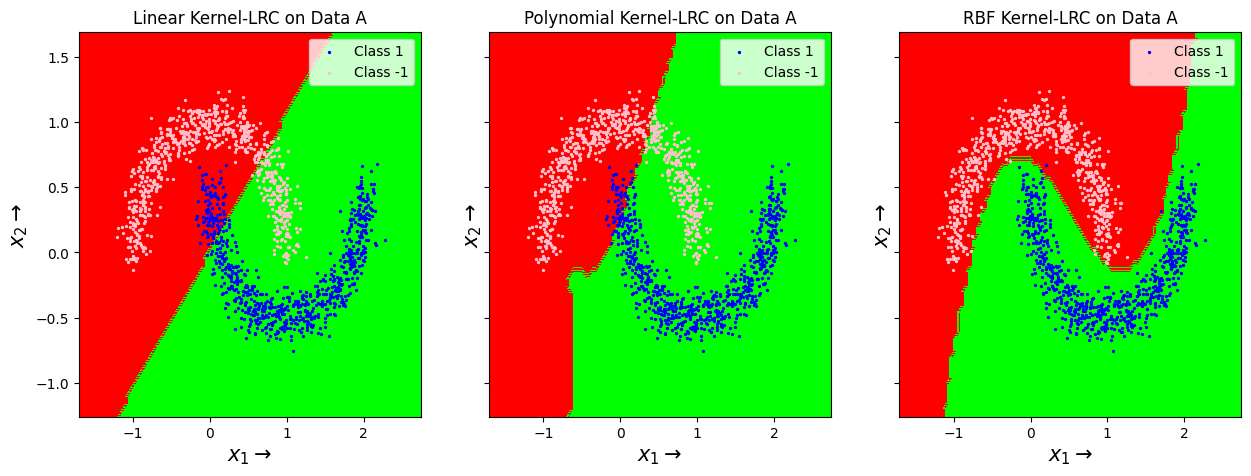

<Figure size 640x480 with 0 Axes>

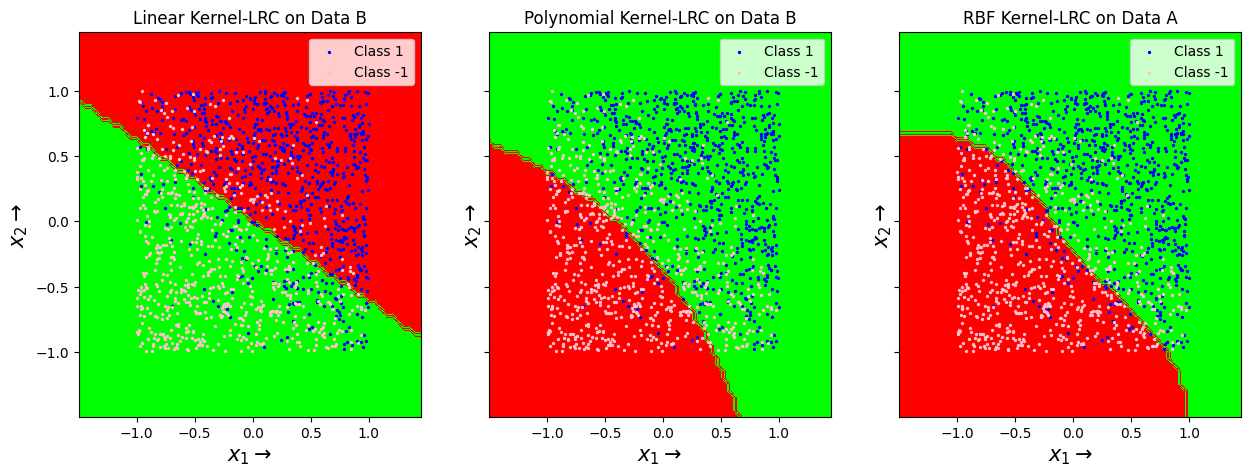

In [6]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

#1st Data set
dataSet = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'], dataSet['arr_1'], dataSet['arr_2'], dataSet['arr_3']
minX = min(X_train[:, 0]), min(X_train[:, 1])
maxX = max(X_train[:, 0]), max(X_train[:, 1])
X, Y = np.meshgrid(np.arange(minX[0]-0.5, maxX[0]+0.5, 0.05), np.arange(minX[1]-0.5, maxX[1]+0.5, 0.05))
samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis = 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'linear', reg_param = 0.0001, kernel_param = 1, num_iter_gd = 100)
Y_a_estimate = test_pred(alpha, X_train, Y_train, samples,kernel = 'linear', kernel_param = 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'poly', reg_param = 0.001, kernel_param = 3, num_iter_gd = 100)
Y_b_estimate = test_pred(alpha, X_train, Y_train, samples,kernel = 'poly', kernel_param = 3)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'rbf', reg_param = 0.0001, kernel_param = 1, num_iter_gd = 100)
Y_c_estimate = test_pred(alpha, X_train, Y_train, samples,kernel = 'rbf', kernel_param = 1)
plt.figure(0)
f, (subp1, subp2, subp3) = plt.subplots(1, 3, sharex = False, sharey = True, figsize = (15, 5))
subp1.contourf(X, Y, Y_a_estimate.reshape(X.shape), colors = ['#FF0000', '#00FF00'])
subp1.scatter(X_train[Y_train   ==    1][:, 0], X_train[Y_train   ==    1][:, 1], s = 2, c = '#0000ff', label = 'Class 1')
subp1.scatter(X_train[Y_train   ==    -1][:, 0], X_train[Y_train   ==    -1][:, 1], s = 2, c = '#FFC0CB', label = 'Class -1')
subp1.set_title('Linear Kernel-LRC on Data A')
subp1.set_xlabel(r'$x_{1}\rightarrow$', size = 15)
subp1.set_ylabel(r'$x_{2}\rightarrow$', size = 15)
subp1.legend()
subp2.contourf(X, Y, Y_b_estimate.reshape(X.shape), colors = ['#FF0000', '#00FF00'])
subp2.scatter(X_train[Y_train   ==    1][:, 0], X_train[Y_train   ==    1][:, 1], s = 2, c = '#0000ff', label = 'Class 1')
subp2.scatter(X_train[Y_train   ==    -1][:, 0], X_train[Y_train   ==    -1][:, 1], s = 2, c = '#FFC0CB', label = "Class -1")
subp2.set_title('Polynomial Kernel-LRC on Data A')
subp2.set_xlabel(r'$x_{1}\rightarrow$', size = 15)
subp2.set_ylabel(r'$x_{2}\rightarrow$', size = 15)
subp2.legend()
subp3.contourf(X, Y, Y_c_estimate.reshape(X.shape), colors = ['#FF0000', '#00FF00'])
subp3.scatter(X_train[Y_train   ==    1][:, 0], X_train[Y_train   ==    1][:, 1], s = 2, c = '#0000ff', label = 'Class 1')
subp3.scatter(X_train[Y_train   ==    -1][:, 0], X_train[Y_train   ==    -1][:, 1], s = 2, c = '#FFC0CB', label = 'Class -1')
subp3.set_title('RBF Kernel-LRC on Data A')
subp3.set_xlabel(r'$x_{1}\rightarrow$', size = 15)
subp3.set_ylabel(r'$x_{2}\rightarrow$', size = 15)
subp3.legend()
plt.show()

#2nd Data set
dataSet = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'], dataSet['arr_1'], dataSet['arr_2'], dataSet['arr_3']
minX = min(X_train[:, 0]), min(X_train[:, 1])
maxX = max(X_train[:, 0]), max(X_train[:, 1])
X, Y = np.meshgrid(np.arange(minX[0]-0.5, maxX[0]+0.5, 0.05), np.arange(minX[1]-0.5, maxX[1]+0.5, 0.05))
samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis = 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'linear', reg_param = 1, kernel_param = 1, num_iter_gd = 100)
Y_a_estimate = test_pred(alpha, X_train, Y_train, samples,kernel = 'linear', kernel_param = 1)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'poly', reg_param = 0.001, kernel_param = 2, num_iter_gd = 100)
Y_b_estimate = test_pred(alpha, X_train, Y_train, samples,kernel = 'poly', kernel_param = 2)
alpha = train_pred_logistic_regression(X_train, Y_train, kernel = 'rbf', reg_param = 0.0001, kernel_param = 4, num_iter_gd = 100)
Y_c_estimate = test_pred(alpha, X_train, Y_train, samples,kernel = 'rbf', kernel_param = 4)
plt.figure(0)
f, (subp1, subp2, subp3) = plt.subplots(1, 3, sharex = False, sharey = True, figsize = (15, 5))
subp1.contourf(X, Y, Y_a_estimate.reshape(X.shape), colors = ['#FF0000', '#00FF00'])
subp1.scatter(X_train[Y_train   ==    1][:, 0], X_train[Y_train   ==    1][:, 1], s = 2, c = '#0000ff', label = 'Class 1')
subp1.scatter(X_train[Y_train   ==    -1][:, 0], X_train[Y_train   ==    -1][:, 1], s = 2, c = '#FFC0CB', label = 'Class -1')
subp1.set_title('Linear Kernel-LRC on Data B')
subp1.set_xlabel(r'$x_{1}\rightarrow$', size = 15)
subp1.set_ylabel(r'$x_{2}\rightarrow$', size = 15)
subp1.legend()
subp2.contourf(X, Y, Y_b_estimate.reshape(X.shape), colors = ['#FF0000', '#00FF00'])
subp2.scatter(X_train[Y_train   ==    1][:, 0], X_train[Y_train   ==    1][:, 1], s = 2, c = '#0000ff', label = 'Class 1')
subp2.scatter(X_train[Y_train   ==    -1][:, 0], X_train[Y_train   ==    -1][:, 1], s = 2, c = '#FFC0CB', label = "Class -1")
subp2.set_title('Polynomial Kernel-LRC on Data B')
subp2.set_xlabel(r'$x_{1}\rightarrow$', size = 15)
subp2.set_ylabel(r'$x_{2}\rightarrow$', size = 15)
subp2.legend()
subp3.contourf(X, Y, Y_c_estimate.reshape(X.shape), colors = ['#FF0000', '#00FF00'])
subp3.scatter(X_train[Y_train   ==    1][:, 0], X_train[Y_train   ==    1][:, 1], s = 2, c = '#0000ff', label = 'Class 1')
subp3.scatter(X_train[Y_train   ==    -1][:, 0], X_train[Y_train   ==    -1][:, 1], s = 2, c = '#FFC0CB', label = 'Class -1')
subp3.set_title('RBF Kernel-LRC on Data A')
subp3.set_xlabel(r'$x_{1}\rightarrow$', size = 15)
subp3.set_ylabel(r'$x_{2}\rightarrow$', size = 15)
subp3.legend()
plt.show()


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [7]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here

def svm_classifier(X, Y, X_test, kernel='linear', reg_param = 0., kernel_param = 1.):
  classifier = svm.SVC( C = reg_param, kernel = kernel, gamma = kernel_param)
  classifier.fit(X, Y)
  return classifier.predict(X_test)

In [8]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set.
# Also for generating the numbers that you report below.
dataSet = np.load("dataset_A.npz")
lin_kernel_error_trainor = np.zeros(4)
lin_kernel_error_testor = np.zeros(4)
poly_kernel_error_trainor = np.zeros(4)
poly_kernel_error_testor = np.zeros(4)
rbf_kernel_error_trainor = np.zeros(4)
rbf_kernel_error_testor = np.zeros(4)
X_train, Y_train, X_test, Y_test = (
    dataSet["arr_0"],
    dataSet["arr_1"],
    dataSet["arr_2"],
    dataSet["arr_3"],
)
kernel_param_vals = [1e-2, 1e-1, 1, 2, 3, 4, 5]
reg_param_vals = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
length1 = len(kernel_param_vals)
length2 = len(reg_param_vals)
lin_kernel_val_error = np.zeros((len(kernel_param_vals), len(reg_param_vals)))
poly_kernel_val_error = np.zeros((len(kernel_param_vals), len(reg_param_vals)))
rbf_kernel_val_error = np.zeros((len(kernel_param_vals), len(reg_param_vals)))
X_validation = X_train[:200, :]
Y_validation = Y_train[:200]
for i in range(len(kernel_param_vals)):
    for j in range(len(reg_param_vals)):
        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="linear",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )
        lin_kernel_val_error[i, j] = 1 - len(Y_validation[Y_prediction  ==  Y_validation]) / len(Y_validation)
        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="poly",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )

        poly_kernel_val_error[i, j] = 1 - len(
            Y_validation[Y_prediction  ==  Y_validation]
        ) / len(Y_validation)

        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="rbf",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )

        rbf_kernel_val_error[i, j] = 1 - len(
            Y_validation[Y_prediction  ==  Y_validation]
        ) / len(Y_validation)
opt_lin_a = reg_param_vals[
    np.where(lin_kernel_val_error  ==  np.amin(lin_kernel_val_error))[1][0]
]
opt_poly_kernel_a = kernel_param_vals[
    np.where(poly_kernel_val_error  ==  np.amin(poly_kernel_val_error))[0][0]
]
opt_poly_reg_a = reg_param_vals[
    np.where(poly_kernel_val_error  ==  np.amin(poly_kernel_val_error))[1][0]
]
opt_rbf_kernel_a = kernel_param_vals[
    np.where(rbf_kernel_val_error  ==  np.amin(rbf_kernel_val_error))[0][0]
]
opt_rbf_reg_a = reg_param_vals[
    np.where(rbf_kernel_val_error  ==  np.amin(rbf_kernel_val_error))[1][0]
]
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="linear",
    reg_param=opt_lin_a,
    kernel_param=1,
)
lin_kernel_error_testor[0] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="poly",
    reg_param=opt_poly_reg_a,
    kernel_param=opt_poly_kernel_a,
)
poly_kernel_error_testor[0] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="rbf",
    reg_param=opt_rbf_reg_a,
    kernel_param=opt_rbf_kernel_a,
)
rbf_kernel_error_testor[0] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="linear",
    reg_param=opt_lin_a,
    kernel_param=1,
)
lin_kernel_error_trainor[0] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="poly",
    reg_param=opt_poly_reg_a,
    kernel_param=opt_poly_kernel_a,
)
poly_kernel_error_trainor[0] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="rbf",
    reg_param=opt_rbf_reg_a,
    kernel_param=opt_rbf_kernel_a,
)
rbf_kernel_error_trainor[0] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
dataSet = np.load("dataset_B.npz")
X_train, Y_train, X_test, Y_test = (
    dataSet["arr_0"],
    dataSet["arr_1"],
    dataSet["arr_2"],
    dataSet["arr_3"],
)
X_validation = X_train[:200, :]
Y_validation = Y_train[:200]

for i in range(len(kernel_param_vals)):
    for j in range(len(reg_param_vals)):
        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="linear",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )

        lin_kernel_val_error[i, j] = 1 - len(Y_validation[Y_prediction  ==  Y_validation]) / len(Y_validation)

        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="poly",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )

        poly_kernel_val_error[i, j] = 1 - len(Y_validation[Y_prediction  ==  Y_validation]) / len(Y_validation)

        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="rbf",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )

        rbf_kernel_val_error[i, j] = 1 - len(
            Y_validation[Y_prediction  ==  Y_validation]
        ) / len(Y_validation)


opt_lin_b = reg_param_vals[
    np.where(lin_kernel_val_error  ==  np.amin(lin_kernel_val_error))[1][0]
]
opt_poly_kernel_b = kernel_param_vals[
    np.where(poly_kernel_val_error  ==  np.amin(poly_kernel_val_error))[0][0]
]
opt_poly_reg_b = reg_param_vals[
    np.where(poly_kernel_val_error  ==  np.amin(poly_kernel_val_error))[1][0]
]
opt_rbf_kernel_b = kernel_param_vals[
    np.where(rbf_kernel_val_error  ==  np.amin(rbf_kernel_val_error))[0][0]
]
opt_rbf_reg_b = reg_param_vals[
    np.where(rbf_kernel_val_error  ==  np.amin(rbf_kernel_val_error))[1][0]
]
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="linear",
    reg_param=opt_lin_b,
    kernel_param=1,
)
lin_kernel_error_testor[1] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="poly",
    reg_param=opt_poly_reg_b,
    kernel_param=opt_poly_kernel_b,
)
poly_kernel_error_testor[1] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="rbf",
    reg_param=opt_rbf_reg_b,
    kernel_param=opt_rbf_kernel_b,
)
rbf_kernel_error_testor[1] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="linear",
    reg_param=opt_lin_b,
    kernel_param=1,
)
lin_kernel_error_trainor[1] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="poly",
    reg_param=opt_poly_reg_b,
    kernel_param=opt_poly_kernel_b,
)
poly_kernel_error_trainor[1] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="rbf",
    reg_param=opt_rbf_reg_b,
    kernel_param=opt_rbf_kernel_b,
)
rbf_kernel_error_trainor[1] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
dataSet = np.load("dataset_C.npz")
X_train, Y_train, X_test, Y_test = (
    dataSet["arr_0"],
    dataSet["arr_1"],
    dataSet["arr_2"],
    dataSet["arr_3"],
)
X_validation = X_train[:200, :]
Y_validation = Y_train[:200]
for i in range(len(kernel_param_vals)):
    for j in range(len(reg_param_vals)):
        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="linear",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )
        lin_kernel_val_error[i, j] = 1 - len(
            Y_validation[Y_prediction  ==  Y_validation]
        ) / len(Y_validation)
        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="poly",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )
        poly_kernel_val_error[i, j] = 1 - len(
            Y_validation[Y_prediction  ==  Y_validation]
        ) / len(Y_validation)
        Y_prediction = svm_classifier(
            X_train,
            Y_train,
            X_validation,
            kernel="rbf",
            reg_param=reg_param_vals[j],
            kernel_param=kernel_param_vals[i],
        )
        rbf_kernel_val_error[i, j] = 1 - len(
            Y_validation[Y_prediction  ==  Y_validation]
        ) / len(Y_validation)
opt_lin_c = reg_param_vals[
    np.where(lin_kernel_val_error  ==  np.amin(lin_kernel_val_error))[1][0]
]
opt_poly_kernel_c = kernel_param_vals[
    np.where(poly_kernel_val_error  ==  np.amin(poly_kernel_val_error))[0][0]
]
opt_poly_reg_c = reg_param_vals[
    np.where(poly_kernel_val_error  ==  np.amin(poly_kernel_val_error))[1][0]
]
opt_rbf_kernel_c = kernel_param_vals[
    np.where(rbf_kernel_val_error  ==  np.amin(rbf_kernel_val_error))[0][0]
]
opt_rbf_reg_c = reg_param_vals[
    np.where(rbf_kernel_val_error  ==  np.amin(rbf_kernel_val_error))[1][0]
]
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="linear",
    reg_param=opt_lin_c,
    kernel_param=1,
)
lin_kernel_error_testor[2] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="poly",
    reg_param=opt_poly_reg_c,
    kernel_param=opt_poly_kernel_c,
)
poly_kernel_error_testor[2] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_test,
    kernel="rbf",
    reg_param=opt_rbf_reg_c,
    kernel_param=opt_rbf_kernel_c,
)
rbf_kernel_error_testor[2] = 1 - len(Y_test[Y_prediction  ==  Y_test]) / len(Y_test)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="linear",
    reg_param=opt_lin_c,
    kernel_param=1,
)
lin_kernel_error_trainor[2] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="poly",
    reg_param=opt_poly_reg_c,
    kernel_param=opt_poly_kernel_c,
)
poly_kernel_error_trainor[2] = 1 - len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train)
Y_prediction = svm_classifier(
    X_train,
    Y_train,
    X_train,
    kernel="rbf",
    reg_param=opt_rbf_reg_c,
    kernel_param=opt_rbf_kernel_c,
)
rbf_kernel_error_trainor[2] = 1 - (len(Y_train[Y_prediction  ==  Y_train]) / len(Y_train))

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

Lin Kernel : 

Dataset | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 1 | 12.7 | 13
B | 0.01 | 16.5 | 18.5
C | 9.8 | 6.4 | 11


Poly kernel : 

Dataset | Kernel parameter |   Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- |  --- |--- |---
A | 1 | 0.1 | 6.3 | 8.4
B |4 | 0.01 | 16.8 | 18.9
C |0.01 | 0.001 | 0.4 | 4.5


Rbf kernel : 

Dataset | Kernel parameter | Regularisation parameter | Train zero-one error | Test zero-one error
--- |--- | --- |--- |---
A | 1 | 0.1 | 0.64 | 0.38
B | 0.01 | 0.1 | 18.7 | 19.8
C | 0.01 | 1 | 0 | 2.1

Observations :
1) As for dataset A, the performance is clearly worse for linear kernel over others, indicating a non-linear boundary. And the data can be inferred to be separable completely due to the fact that the reg parameter is higher for good performance (Svm with hard margin).
2) All the kernels have comparable performance here, indicating that the boundary would be a linearly separable one. And reg parameter is low for good performance (Svm with soft margin).

<Figure size 640x480 with 0 Axes>

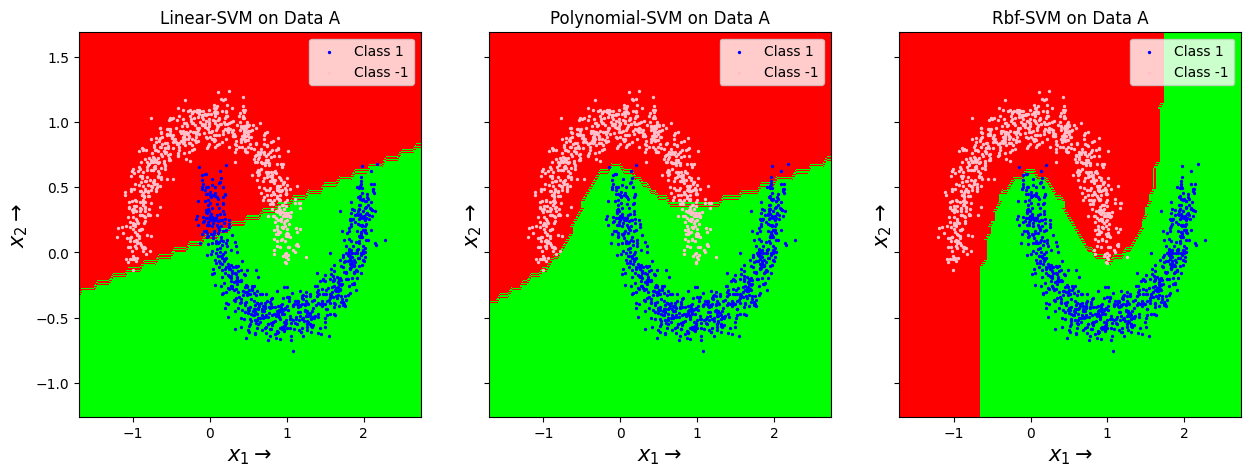

<Figure size 640x480 with 0 Axes>

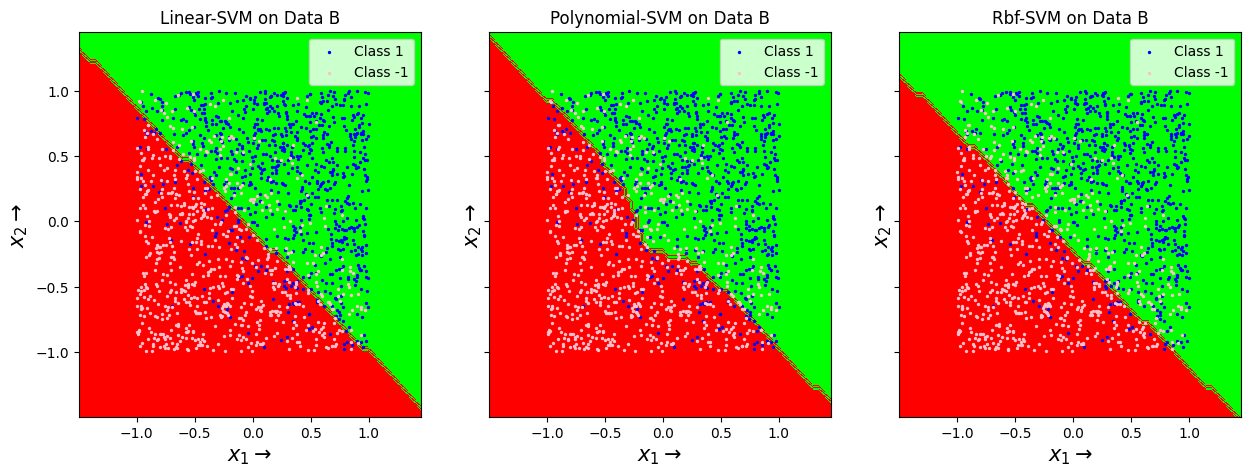

In [9]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

dataSet = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Y_prediction_a = svm_classifier(X_train, Y_train, samples, kernel='linear', reg_param=1, kernel_param=1)
Y_prediction_b = svm_classifier(X_train, Y_train, samples, kernel='poly', reg_param=0.1, kernel_param=1)
Y_prediction_c = svm_classifier(X_train, Y_train, samples, kernel='rbf', reg_param=0.1, kernel_param=1)
plt.figure(0)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
subp1.contourf(X,Y,Y_prediction_a.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp1.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp1.set_title('Linear-SVM on Data A')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 
subp2.contourf(X,Y,Y_prediction_b.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff', label='Class 1')
subp2.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB', label="Class -1")
subp2.set_title('Polynomial-SVM on Data A')
subp2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend()
subp3.contourf(X,Y,Y_prediction_c.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff', label='Class 1')
subp3.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB', label='Class -1')
subp3.set_title('Rbf-SVM on Data A')
subp3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend()
plt.show()

dataSet = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
Y_prediction_a = svm_classifier(X_train, Y_train, samples, kernel='linear', reg_param=0.01, kernel_param=1)
Y_prediction_b = svm_classifier(X_train, Y_train, samples, kernel='poly', reg_param=0.01, kernel_param=4)
Y_prediction_c = svm_classifier(X_train, Y_train, samples, kernel='rbf', reg_param=0.1, kernel_param=0.01)
plt.figure(0)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
subp1.contourf(X,Y,Y_prediction_a.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp1.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp1.set_title('Linear-SVM on Data B')
subp1.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 
subp2.contourf(X,Y,Y_prediction_b.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff', label='Class 1')
subp2.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB', label="Class -1")
subp2.set_title('Polynomial-SVM on Data B')
subp2.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend()
subp3.contourf(X,Y,Y_prediction_c.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff', label='Class 1')
subp3.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB', label='Class -1')
subp3.set_title('Rbf-SVM on Data B')
subp3.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend()
plt.show()

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [10]:
# CodeWrite cell
# Write Decision tree classifier from scratch, 
# write only functions here (you may write extra functions here if you wish)
from numpy import log2

def computeEntropy(leftPositivePointsCount, rightPositivePointsCount, leftNegativePointsCount, rightNegativePointsCount, pointsCount, reg=0.001):
  leftPointsCount = leftPositivePointsCount + leftNegativePointsCount
  rightPointsCount = rightNegativePointsCount + rightPositivePointsCount
  pointsCount = reg + pointsCount
  if leftPositivePointsCount*leftNegativePointsCount  ==  0:
    leftEntr = 0
  else:
    leftEntr = -(leftPositivePointsCount/leftPointsCount)*log2(leftPositivePointsCount/leftPointsCount) - \
                (leftNegativePointsCount/leftPointsCount) * \
                log2(leftNegativePointsCount/leftPointsCount)
  if rightPositivePointsCount*rightNegativePointsCount  ==  0:
    rightEntr = 0
  else:
    rightEntr = -(rightPositivePointsCount/rightPointsCount)*log2(rightPositivePointsCount/rightPointsCount) - \
                (rightNegativePointsCount/rightPointsCount) * \
                log2(rightNegativePointsCount/rightPointsCount)
  return (leftPointsCount/pointsCount)*leftEntr + (rightPointsCount / pointsCount) * rightEntr


def decisionTreeTrain(X, Y, num_nodes_stop = 1, criterion = 'accururacy'):
  nAttr = X.shape[1]
  threshMin = np.zeros(nAttr)
  threshMax = np.zeros(nAttr)
  for i in range(nAttr):
    threshMin[i] = np.min(X[:,i])
    threshMax[i] = np.max(X[:,i])
  tree = {}
  node = 1
  split_count = 100
  newY = Y
  newX = X
  nodes = 0
  minimum = np.inf
  while node>0:
    maximum = 0
    for attribute_choice in range(nAttr):
      for i in range(split_count-1):
        change = (threshMax[attribute_choice] - threshMin[attribute_choice])*(i+1)/split_count
        yDec = newY[newX[:,attribute_choice]>=threshMin[attribute_choice] + change]
        nDec = newY[newX[:,attribute_choice]<threshMin[attribute_choice] + change]
        yDec_pos = yDec[yDec  ==  1]
        nDec_neg = nDec[nDec  ==  -1]
        accur_yes_pos = (len(yDec_pos)+len(nDec_neg))
        accur_yes_neg = len(newY)-accur_yes_pos

        entr = computeEntropy(len(nDec)-len(nDec_neg), len(yDec_pos), len(nDec_neg), len(yDec)-len(yDec_pos), len(newY), reg=0.001)    
        if criterion  ==  'accururacy':
          if accur_yes_pos>accur_yes_neg:
            if accur_yes_pos>maximum:
              maximum = accur_yes_pos
              attribute_optimal = attribute_choice
              max_thres = threshMin[attribute_choice] + change
              leaf = '1'
              nodes = len(nDec)
              newY_temp = newY[newX[:,attribute_choice]<threshMin[attribute_choice] + change]
              newX_temp = newX[newX[:,attribute_choice]<threshMin[attribute_choice] + change]
          if accur_yes_neg>accur_yes_pos:
            if accur_yes_neg>maximum:
              maximum = accur_yes_neg
              attribute_optimal = attribute_choice
              max_thres = threshMin[attribute_choice] + change
              leaf = '-1'
              nodes = len(nDec)
              newY_temp = newY[newX[:,attribute_choice]<threshMin[attribute_choice] + change]
              newX_temp = newX[newX[:,attribute_choice]<threshMin[attribute_choice] + change]
        elif criterion  ==  'entr':
          if entr<minimum:
            minimum = entr
  
            attribute_optimal = attribute_choice
            max_thres = threshMin[attribute_choice]+change
            nodes = len(nDec)
            newY_temp = newY[newX[:,attribute_choice]<threshMin[attribute_choice]+change]
            newX_temp = newX[newX[:,attribute_choice]<threshMin[attribute_choice]+change]
            if accur_yes_pos>accur_yes_neg:
              leaf = '1'
            if accur_yes_pos<accur_yes_neg:
              leaf = '-1'
    if nodes < num_nodes_stop:
      if node > 1:
        tree[node] = [attribute_optimal,max_thres,'none']
        if leaf == '1':
          tree[node+3] = ['none','none','1']
          tree[node+2] = ['none','none','-1']
        if leaf == '-1':
          tree[node+3] = ['none','none','-1']
          tree[node+2] = ['none','none','1']
      if node == 1: #elif node is 1
        tree[node] = [attribute_optimal,max_thres,'none']
        if leaf == '1':
          tree[node+2] = ['none','none','1']
          tree[node+1] = ['none','none','-1']
        if leaf == '-1':
          tree[node+2] = ['none','none','-1']
          tree[node+1] = ['none','none','1']
      break;
    if node>1:
      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+3] = ['none','none',leaf]
      node = node + 2
    if node  ==  1:
      tree[node] = [attribute_optimal,max_thres,'none']
      tree[node+2] = ['none','none',leaf]
      node = node + 1
    newY = newY_temp
    newX = newX_temp
    threshMax[attribute_optimal] = max_thres
    pos_Y = newY[newY == 1]
    if len(pos_Y)  ==  0:
      tree[node] = ['none','none','-1']
      break;
    if len(pos_Y)  ==  len(newY):
      tree[node] = ['none','none','1']
      break;
  return tree


def decisionTreeEvaluation(tree, test_X):
  nodes = len(tree)
  Y_prediction = np.zeros((test_X.shape[0]))

  for k in range(test_X.shape[0]):
      next_node = 1
      while next_node <= nodes:
        if tree[next_node][0]  ==  'none':
          if tree[next_node][2]  ==  '1':
            Y_prediction[k] = 1
          if tree[next_node][2]  ==  '-1':
            Y_prediction[k] = -1
          break
        attr_choice = tree[next_node][0]
        threshold = tree[next_node][1]
        if test_X[k, attr_choice] >= threshold:
          if next_node > 1:
            next_node = next_node + 3
          if next_node  ==  1:
            next_node = next_node + 2
        if test_X[k, attr_choice] < threshold:
          if next_node > 1:
            next_node = next_node + 2
          if next_node  ==  1:
            next_node = next_node + 1
  return Y_prediction


In [11]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entr also.
variable1 = 0
error_test_accur = np.zeros(4)
error_test_entropy = np.zeros(4)
error_train_accur = np.zeros(4)
error_train_entropy = np.zeros(4)
dataSet = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
num_nodes_hyperparam = [250,300,400,500,600,700,800,900]
accur1 = np.zeros(len(num_nodes_hyperparam))
accur2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for iter in range(len(num_nodes_hyperparam)):
  tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accururacy')
  tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entr')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  Y_predictiolength1 = decisionTreeEvaluation(tree_1, val_X)  
  accur1[iter] = 1 - len(val_Y[val_Y == Y_predictiolength1])/len(val_Y)
  Y_predictiolength2 = decisionTreeEvaluation(tree_2, val_X)  
  accur2[iter] = 1 - len(val_Y[val_Y == Y_predictiolength2])/len(val_Y)
optNodes_accur_a = num_nodes_hyperparam[np.where(accur1  ==  np.amin(accur1))[0][0]]
error_train_accur[variable1] = np.amin(accur1)
optNodes_entropy_a = num_nodes_hyperparam[np.where(accur2  ==  np.amin(accur2))[0][0]]
error_train_entropy[variable1] = np.amin(accur2)
tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_accur_a, criterion='accururacy')
tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_entropy_a, criterion='entr')
Y_predictiolength1 = decisionTreeEvaluation(tree_1, X_test)  
error_test_accur[variable1] = 1 - len(Y_test[Y_test == Y_predictiolength1])/len(Y_test)
Y_predictiolength2 = decisionTreeEvaluation(tree_2, X_test)  
error_test_entropy[variable1] = 1 - len(Y_test[Y_test == Y_predictiolength2])/len(Y_test)
variable1 += 1

dataSet = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
num_nodes_hyperparam = [250,300,400,500,600,700,800,900]
accur1 = np.zeros(len(num_nodes_hyperparam))
accur2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for i in range(len(num_nodes_hyperparam)):
  tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accururacy')
  tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entr')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  Y_predictiolength1 = decisionTreeEvaluation(tree_1, val_X)  
  accur1[i] = 1 - len(val_Y[val_Y == Y_predictiolength1])/len(val_Y)
  Y_predictiolength2 = decisionTreeEvaluation(tree_2, val_X)  
  accur2[i] = 1 - len(val_Y[val_Y == Y_predictiolength2])/len(val_Y)
optNodes_accur_b = num_nodes_hyperparam[np.where(accur1  ==  np.amin(accur1))[0][0]]
error_train_accur[variable1] = np.amin(accur1)
optNodes_entropy_b = num_nodes_hyperparam[np.where(accur2  ==  np.amin(accur2))[0][0]]
error_train_entropy[variable1] = np.amin(accur2)
tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_accur_b, criterion='accururacy')
tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_entropy_b, criterion='entr')
Y_predictiolength1 = decisionTreeEvaluation(tree_1, X_test)  
error_test_accur[variable1] = 1 - \
    len(Y_test[Y_test  ==  Y_predictiolength1])/len(Y_test)
Y_predictiolength2 = decisionTreeEvaluation(tree_2, X_test)  
error_test_entropy[variable1] = 1 - \
    len(Y_test[Y_test  ==  Y_predictiolength2])/len(Y_test)
variable1 += 1

dataSet = np.load('dataset_C.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
num_nodes_hyperparam = [100,200,250,300,400,500,600,700,800,900]
accur1 = np.zeros(len(num_nodes_hyperparam))
accur2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for i in range(len(num_nodes_hyperparam)):
  tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accururacy')
  tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entr')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  Y_predictiolength1 = decisionTreeEvaluation(tree_1, val_X)  
  accur1[i] = 1 - len(val_Y[val_Y == Y_predictiolength1])/len(val_Y)
  Y_predictiolength2 = decisionTreeEvaluation(tree_2, val_X)  
  accur2[i] = 1 - len(val_Y[val_Y == Y_predictiolength2])/len(val_Y)
optNodes_accur_c = num_nodes_hyperparam[np.where(accur1  ==  np.amin(accur1))[0][0]]
error_train_accur[variable1] = np.amin(accur1)
optNodes_entropy_c = num_nodes_hyperparam[np.where(accur2  ==  np.amin(accur2))[0][0]]
error_train_entropy[variable1] = np.amin(accur2)
tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_accur_c, criterion='accururacy')
tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_entropy_c, criterion='entr')
Y_predictiolength1 = decisionTreeEvaluation(tree_1, X_test)  
error_test_accur[variable1] = 1 - len(Y_test[Y_test == Y_predictiolength1])/len(Y_test)
Y_predictiolength2 = decisionTreeEvaluation(tree_2, X_test)  
error_test_entropy[variable1] = 1 - len(Y_test[Y_test == Y_predictiolength2])/len(Y_test)
variable1 += 1

dataSet = np.load('dataset_D.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
num_nodes_hyperparam = [30,50,100,200,250,300,400,500,600,700,800,900]
accur1 = np.zeros(len(num_nodes_hyperparam))
accur2 = np.zeros(len(num_nodes_hyperparam))
n = np.zeros(len(num_nodes_hyperparam))
for iter in range(len(num_nodes_hyperparam)):
  tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='accururacy')
  tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=num_nodes_hyperparam[iter], criterion='entr')
  val_X = X_train[0:200]
  val_Y = Y_train[0:200]
  Y_predictiolength1 = decisionTreeEvaluation(tree_1, val_X)  
  accur1[iter] = 1 - len(val_Y[val_Y == Y_predictiolength1])/len(val_Y)
  Y_predictiolength2 = decisionTreeEvaluation(tree_2, val_X)  
  accur2[iter] = 1 - len(val_Y[val_Y == Y_predictiolength2])/len(val_Y)
optNodes_accur_d = num_nodes_hyperparam[np.where(accur1  ==  np.amin(accur1))[0][0]]
error_train_accur[variable1] = np.amin(accur1)
optNodes_entropy_d = num_nodes_hyperparam[np.where(accur2  ==  np.amin(accur2))[0][0]]
error_train_entropy[variable1] = np.amin(accur2)
tree_1 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_accur_d, criterion='accururacy')
tree_2 = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_entropy_d, criterion='entr')
Y_predictiolength1 = decisionTreeEvaluation(tree_1, X_test)  
error_test_accur[variable1] = 1 - len(Y_test[Y_test == Y_predictiolength1])/len(Y_test)
Y_predictiolength2 = decisionTreeEvaluation(tree_2, X_test)  
error_test_entropy[variable1] = 1 - len(Y_test[Y_test == Y_predictiolength2])/len(Y_test)

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

Entropy Criterion : 

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A |250| 22 | 21
B | 600| 19.7 | 22.6
C | 900|12.6 | 25.4
D | 30| 8.1 | 30.3

Accuracy Criterion : 

Dataset | Stopping node choice | Train zero-one error | Test zero-one error
--- |--- |--- |---
A | 250 | 7.7 | 12.3
B | 400 | 25.6 | 27.6
C | 100 | 9.3 | 21.6
D | 30 | 5.6 | 13.8

Observations :
1) You can always overfit & make the decision tree perfectly match training data, but this causes poor performance in real time on new data ( validation & test data) (num_nodes_stop = 1).
2) For Data B, error rate is high die to the high overlap between +ve & -ve points, which perofrm better with diagonal separator, but can't be perfectly achieved with decision trees and give bad performance if tried to so.
3) Due to high dimensionlity of datas C & D, can't be plotted

<Figure size 640x480 with 0 Axes>

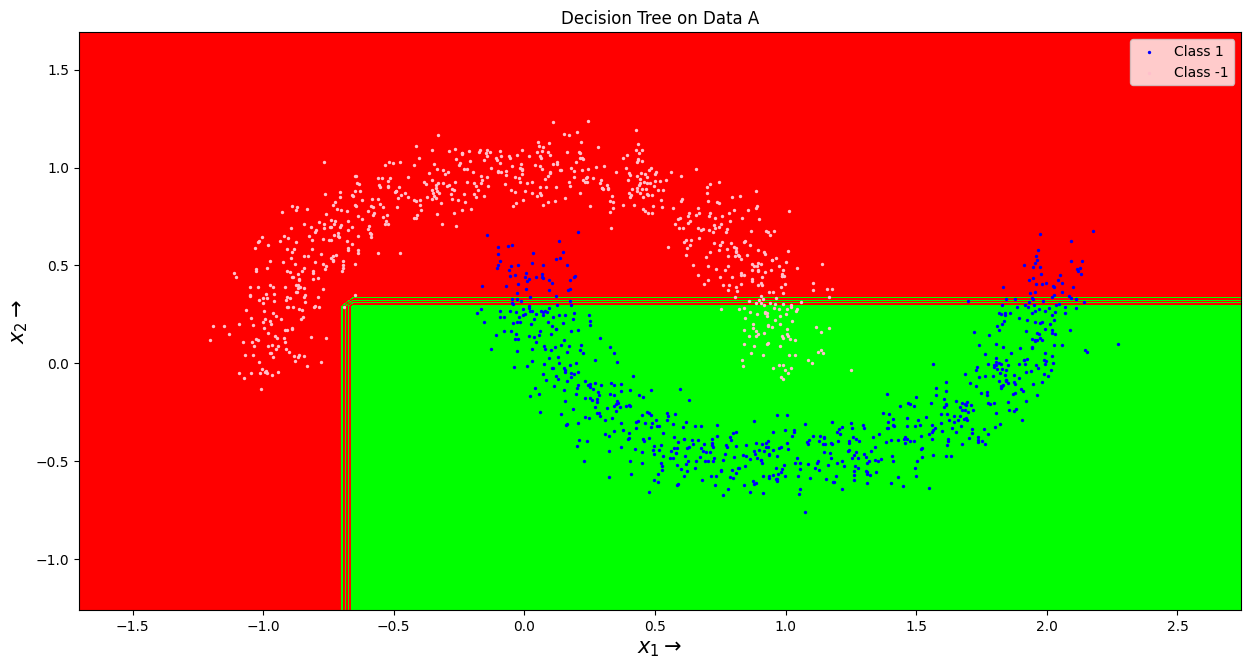

<Figure size 640x480 with 0 Axes>

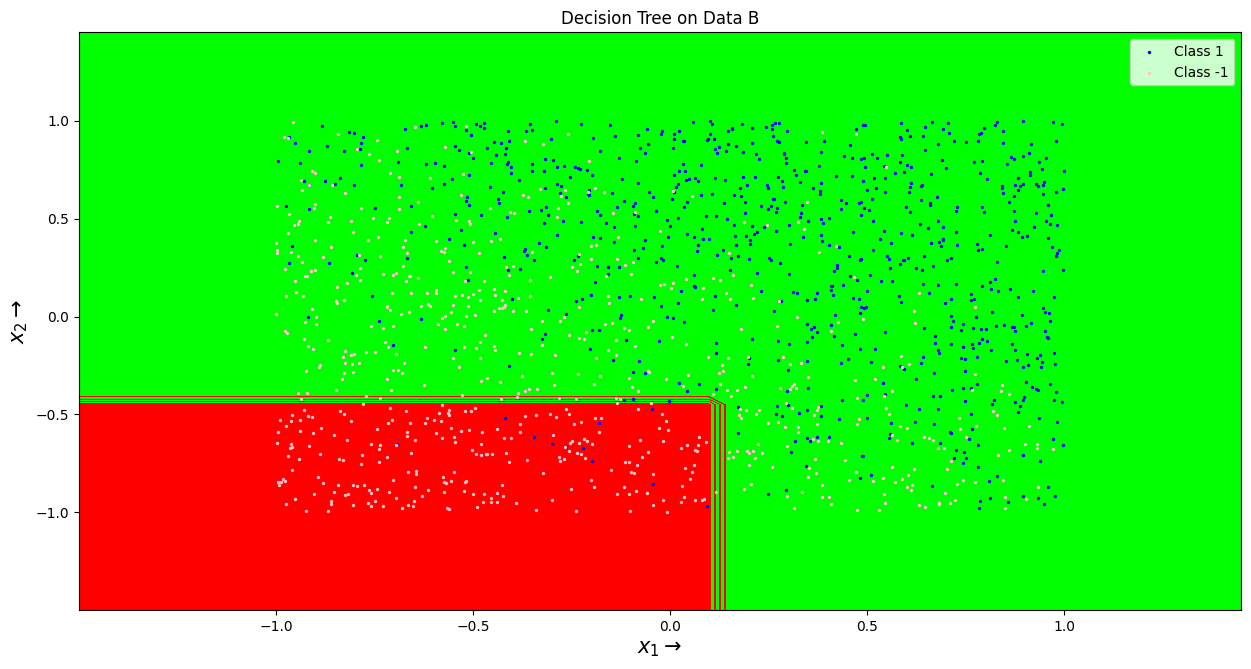

In [12]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accururacy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

dataSet = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'], dataSet['arr_1'], dataSet['arr_2'], dataSet['arr_3']
minX = min(X_train[:, 0]), min(X_train[:, 1])
maxX = max(X_train[:, 0]), max(X_train[:, 1])
X, Y = np.meshgrid(np.arange(minX[0]-0.5, maxX[0]+0.5, 0.05), np.arange(minX[1]-0.5, maxX[1]+0.5, 0.05))
samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)
tree = decisionTreeTrain(X_train, Y_train, num_nodes_stop=optNodes_accur_a, criterion='accururacy')
Y_prediction = decisionTreeEvaluation(tree, samples)
plt.figure(0)
f, (subp1) = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(15, 7.5))
subp1.contourf(X, Y, Y_prediction.reshape(X.shape), colors=['#FF0000', '#00FF00'])
subp1.scatter(X_train[Y_train  ==  1][:, 0], X_train[Y_train  ==  1]
            [:, 1], s=2, c='#0000ff', label='Class 1')
subp1.scatter(X_train[Y_train  ==  -1][:, 0], X_train[Y_train  ==  -1]
            [:, 1], s=2, c='#FFC0CB', label='Class -1')
subp1.set_title('Decision Tree on Data A')
subp1.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$', size=15)
subp1.legend()
plt.show()
dataSet = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'], dataSet['arr_1'], dataSet['arr_2'], dataSet['arr_3']
minX = min(X_train[:, 0]), min(X_train[:, 1])
maxX = max(X_train[:, 0]), max(X_train[:, 1])
X, Y = np.meshgrid(np.arange(
    minX[0]-0.5, maxX[0]+0.5, 0.05), np.arange(minX[1]-0.5, maxX[1]+0.5, 0.05))
samples = np.concatenate([X.reshape(-1, 1), Y.reshape(-1, 1)], axis=1)
tree = decisionTreeTrain(
    X_train, Y_train, num_nodes_stop=optNodes_accur_b, criterion='accururacy')
Y_prediction = decisionTreeEvaluation(tree, samples)
plt.figure(1)
f, (subp1) = plt.subplots(1, 1, sharex=False, sharey=True, figsize=(15, 7.5))
subp1.contourf(X, Y, Y_prediction.reshape(X.shape), colors=['#FF0000', '#00FF00'])
subp1.scatter(X_train[Y_train  ==  1][:, 0], X_train[Y_train  ==  1]
            [:, 1], s=2, c='#0000ff', label='Class 1')
subp1.scatter(X_train[Y_train  ==  -1][:, 0], X_train[Y_train  ==  -1]
            [:, 1], s=2, c='#FFC0CB', label='Class -1')
subp1.set_title('Decision Tree on Data B')
subp1.set_xlabel(r'$x_{1}\rightarrow$', size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$', size=15)
subp1.legend()
plt.show()

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree = 0.5, Fraction of number of features chosen in each node = 0.5, num_nodes_stop = 1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [27]:
# CodeWrite cell
# Write Random Forest classifier. 
from random import randrange
from math import sqrt

def split(val,nRow, data):
  lDec,rDec = list(),list()
  for entry in data:
    if entry[nRow] < val:
      lDec.append(entry)
    else:
      rDec.append(entry)
  return lDec, rDec
  
def splitBest(featureCount, data):
  vals = list(set(row[-1] for row in data))
  best_sc = 999
  best_s = None
  best_ind = 999
  best_v = 999
  list_of_features = list()
  while len(list_of_features) < featureCount:
    i = randrange(len(data[0])-1)
    if i not in list_of_features:
      list_of_features.append(i)
  for j in list_of_features:
    for k in data:
      split_data = split(k[j], j, data)
      ent = computeEntropy(split_data,vals)
      if ent < best_sc:
        best_sc = ent
        best_s = split_data
        best_ind = j
        best_v = k[j]
  return {'index':best_ind,'value':best_v,'groups':best_s}
  
def terminalNode(split_data):
  N  = [row[-1] for row in split_data]
  return max(set(N), key = N.count)

def splitChild(max_depth,depth,min_size,featureCounts,node):
  left, right = node['groups']
  del(node['groups'])
  if not left or not right:
    node['left'] = node['right'] = terminalNode(left+right)
    return
  if depth >= max_depth:
    node['left'] = terminalNode(left)
    node['right'] = terminalNode(right)
    return
  if len(left) <= min_size:
    node['left'] = terminalNode(left)
  else:
    node['left'] = splitBest(featureCounts, left)
    splitChild(max_depth,depth+1,min_size,featureCounts,node['left'])
  if len(right)<=min_size:
    node['right'] = terminalNode(right)
  else:
    node['right'] = splitBest(featureCounts, right)
    splitChild(max_depth,depth+1,min_size,featureCounts,node['right'])

def sampling(ratio, data):
  list_of_samples = list()
  while len(list_of_samples) < round(len(data)*ratio):
    i = randrange(len(data))
    list_of_samples.append(data[i])
  return list_of_samples

def bagging(trainedTrees, index):
  pred = [decisionTreePrediction(t, index) for t in trainedTrees]
  return max(set(pred), key = pred.count)

#check point
def computeEntropy(subSets, sets):
  samples = float(sum([len(subset) for subset in subSets]))
  entropy = 0
  for subset in subSets:
    i = float(len(subset))
    if i == 0:
      continue
    score = 0.0
    for ind_class in sets:
      p = [row[-1] for row in subset].count(ind_class) / i
      score += p * p
    entropy += (i/samples) * (1.0 - score)
  return entropy
          
def decisionTree(featureCounts,maxDepth,minimum_size,data):
  root = splitBest(featureCounts,data)
  splitChild(maxDepth, 1, minimum_size,featureCounts, root)
  return root

def decisionTreePrediction(node, row):
  if row[node['index']] < node['value']:
    if not isinstance(node['left'], dict):
      return node['left']
    else:
      return decisionTreePrediction(node['left'], row)
  else:
    if not isinstance(node['right'], dict):
      return node['right']
    else:
      return decisionTreePrediction(node['right'], row)

def randomForestPrediction(data, test_data, nTrees, featuresCount, minimum_size,sample_size,maxDepth):
  trees = list()
  for i in range(nTrees):
    x = decisionTree(featuresCount,maxDepth,minimum_size,data)
    trees.append(x)
  return [bagging(trees, ind) for ind in test_data]

def randomForestEvaluate(data, testdata, rf, *args):
  prediction = rf(data, testdata, *args)
  testLabel = [entropy[-1] for entropy in testdata]
  count = 0
  for i in range(len(testLabel)):
    if prediction[i] == testLabel[i]:
      count = count + 1
  accururacy = count/float(len(testLabel)) * 100.0
  return prediction, accururacy

In [14]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entr also.
dataset = np.load('dataset_A.npz', mmap_mode = 'r')
trailLenX1 =  dataset['arr_0']
trailLenY1 =  dataset['arr_1']
X_test1 = dataset['arr_2']
Y_test1 = dataset['arr_3']
trainingData = dataFromNpz(trailLenX1,trailLenY1)
datatest = dataFromNpz(X_test1,Y_test1)
sizeMinimum = 1
sample_size =  0.5
n_features = int(sqrt(len(trainingData[0])-1))
for max_depth in [1, 3, 5, 7, 10, 12]:
  for n_trees in [1,5,10,15,20]:
      predresults, accururacy = randomForestEvaluate(trainingData, datatest, randomForestPrediction, n_trees,n_features,sizeMinimum,sample_size,max_depth)
dataset = np.load('dataset_B.npz', mmap_mode = 'r')
trailLenX1 =  dataset['arr_0']
trailLenY1 = dataset['arr_1']
X_test1 = dataset['arr_2']
Y_test1 = dataset['arr_3']
trainingData = dataFromNpz(trailLenX1,trailLenY1)
datatest = dataFromNpz(X_test1,Y_test1)
sizeMinimum = 1
sample_size = 0.5
n_features = int(sqrt(len(trainingData[0])-1))
for max_depth in [1, 3, 5, 7, 10, 12]:
  for n_trees in [1,5,10,15,20]:
      predresults, accururacy = randomForestEvaluate(trainingData, datatest, randomForestPrediction, n_trees,n_features,sizeMinimum,sample_size,max_depth)
dataset = np.load('dataset_C.npz', mmap_mode = 'r')
trailLenX1 =  dataset['arr_0']
trailLenY1 =  dataset['arr_1']
X_test1 = dataset['arr_2']
Y_test1 = dataset['arr_3']
trainingData = dataFromNpz(trailLenX1,trailLenY1)
datatest = dataFromNpz(X_test1,Y_test1)
sizeMinimum = 1
sample_size = 0.5
n_features = int(sqrt(len(trainingData[0])-1))
for max_depth in [1, 3, 5, 7, 10, 12]:
  for n_trees in [1,5,10,15,20]:
      predresults, accururacy = randomForestEvaluate(trainingData, datatest, randomForestPrediction, n_trees,n_features,sizeMinimum,sample_size,max_depth)
dataset = np.load('dataset_D.npz', mmap_mode = 'r')
trailLenX1 =  dataset['arr_0']
trailLenY1 =  dataset['arr_1']
X_test1 = dataset['arr_2']
Y_test1 = dataset['arr_3']
trainingData = dataFromNpz(trailLenX1,trailLenY1)
datatest = dataFromNpz(X_test1,Y_test1)
sizeMinimum = 1
sample_size = 0.5
n_features = int(sqrt(len(trainingData[0])-1))
for max_depth in [1, 3, 5, 7, 10, 12]:
  for n_trees in [1,5,10,15,20]:
      predresults, accururacy = randomForestEvaluate(trainingData, datatest, randomForestPrediction, n_trees,n_features,sizeMinimum,sample_size,max_depth)

"# CodeWrite cell\n# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)\n# Write code here for generating the numbers that you report below.\n# Repeat above for criterion set to entr also.\ndataset = np.load('dataset_A.npz', mmap_mode = 'r')\ntrailLenX1 =  dataset['arr_0']\ntrailLenY1 =  dataset['arr_1']\nX_test1 = dataset['arr_2']\nY_test1 = dataset['arr_3']\ntrainingData = dataFromNpz(trailLenX1,trailLenY1)\ndatatest = dataFromNpz(X_test1,Y_test1)\nsizeMinimum = 1\nsample_size =  0.5\nn_features = int(sqrt(len(trainingData[0])-1))\nfor max_depth in [1, 3, 5, 7, 10, 12]:\n  for n_trees in [1,5,10,15,20]:\n      predresults, accururacy = randomForestEvaluate(trainingData, datatest, randomForestPrediction, n_trees,n_features,sizeMinimum,sample_size,max_depth)\ndataset = np.load('dataset_B.npz', mmap_mode = 'r')\ntrailLenX1 =  dataset['arr_0']\ntrailLenY1 = dataset['arr_1']\nX_test1 = dataset['arr_2']\nY_test1 = dataset['arr_3']\ntrainingData = dataFromNpz(trail

TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

Entropy criterion :

Dataset | No. of trees | Max no. of nodes | Accuracy
--- |--- |--- |---
A | 5 | 12 | 98.5
B | 20 | 3 | 79.7
C | 20 |7 | 96.1
D | 5 | 10 | 98.7


## Observations

1) Ragged decision Boundaries for high nodes count & higher decision boundaries when no.of tress is increased. Features used are around sqrt(Total features) - 1 for best results.
2) Large number of nodes helped in case of Dataset A (high accuracy), indicating clustered data needing ragged decision boundary giving.
3) More no.of trees are helpful in case of Dataset B, due to large mixing of data and no clear clustering. This helped because of more decision boundaries are generated.
4) Due to high dimensionlity of datas C & D, can't be plotted

<Figure size 640x480 with 0 Axes>

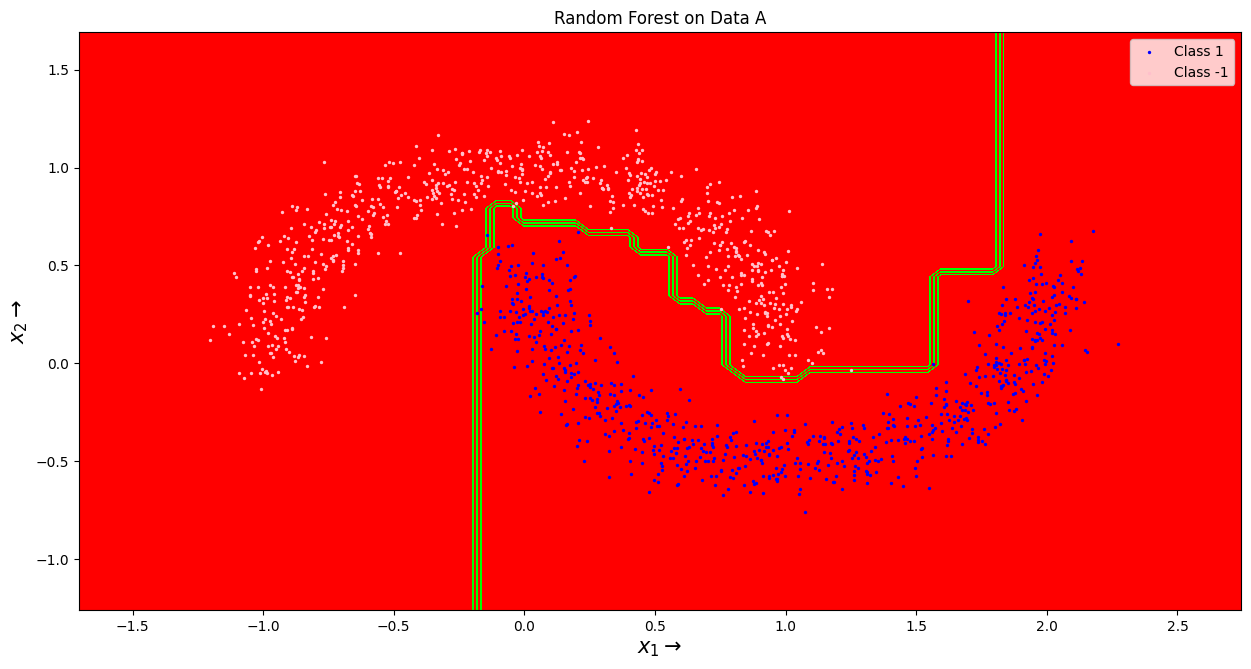

<Figure size 640x480 with 0 Axes>

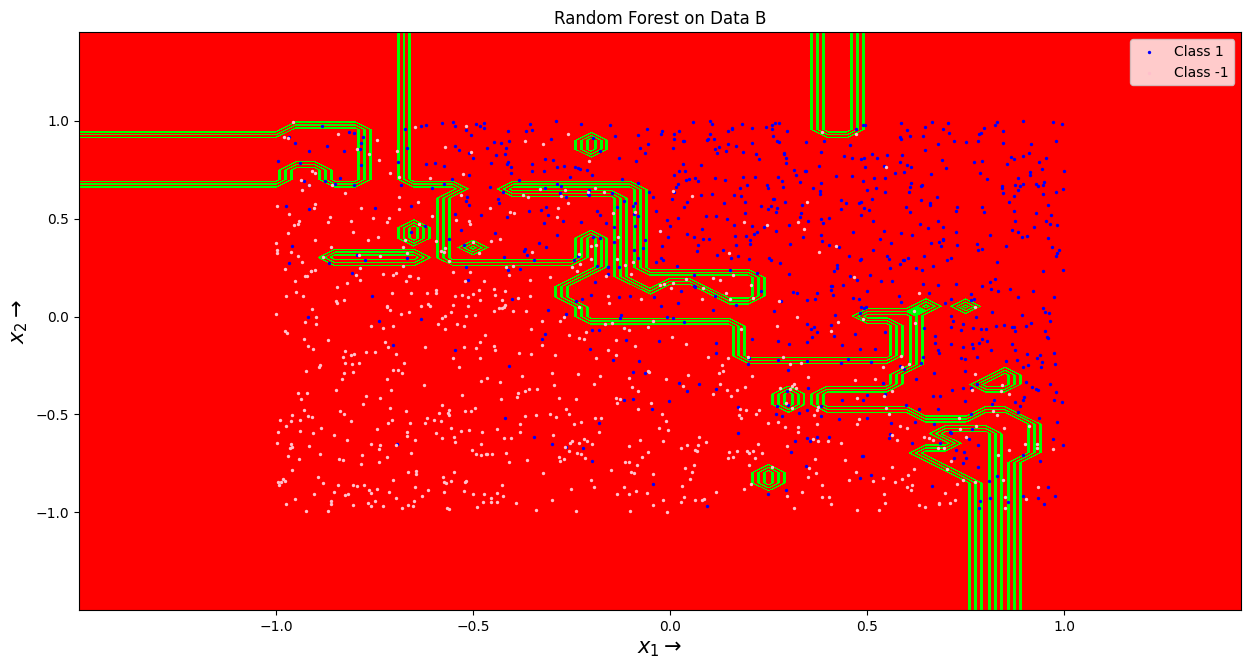

In [28]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accururacy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 
data1 = np.load('dataset_A.npz', mmap_mode='r')
dataSet = data1
trailLenX1 = data1['arr_0'] 
trailLenY1 = data1['arr_1'] 
X_test1 = data1['arr_2']
Y_test1 = data1['arr_3']
n_trees = 5
trainingData = dataFromNpz(trailLenX1,trailLenY1)
n_features = int(sqrt(len(trainingData[0]) - 1))
max_depth = 12
sizeMinimum = 1
sample_size = 0.5
predf = np.asarray(randomForestPrediction(dataFromNpz(np.column_stack((trailLenX1[:,0], trailLenX1[:,1])), trailLenY1), dataFromNpz(np.column_stack((trailLenX1[:,0], trailLenX1[:,1])), trailLenY1), n_trees,n_features,sizeMinimum,sample_size,max_depth))
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples = np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
h = np.zeros((len(samples),))
h.shape
plot_td = dataFromNpz(samples,h)
predf = np.asarray(randomForestPrediction(dataFromNpz(np.column_stack((trailLenX1[:,0], trailLenX1[:,1])), trailLenY1), plot_td, n_trees,n_features,sizeMinimum,sample_size,max_depth))
plt.figure(1)
f, (subp1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(15,7.5))
subp1.contourf(X,Y,predf.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp1.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp1.set_title('Random Forest on Data A')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 
plt.show()
data1 = np.load('dataset_B.npz', mmap_mode='r')
trailLenX1= data1['arr_0'] 
trailLenY1= data1['arr_1'] 
X_test1=data1['arr_2']
Y_test1=data1['arr_3']
trainingData=dataFromNpz(trailLenX1,trailLenY1)
max_depth = 10
sizeMinimum = 1
sample_size = 0.5
n_features = int(sqrt(len(trainingData[0])-1))
n_trees = 10
predf = np.asarray(randomForestPrediction(dataFromNpz(np.column_stack((trailLenX1[:,0], trailLenX1[:,1])), trailLenY1), dataFromNpz(np.column_stack((trailLenX1[:,0], trailLenX1[:,1])), trailLenY1), n_trees,n_features,sizeMinimum,sample_size,max_depth))
dataSet = data1
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
h = np.zeros((len(samples),))
h.shape
plot_td = dataFromNpz(samples,h)
predf = np.asarray(randomForestPrediction(dataFromNpz(np.column_stack((trailLenX1[:,0], trailLenX1[:,1])), trailLenY1), plot_td, n_trees,n_features,sizeMinimum,sample_size,max_depth))
plt.figure(1)
f, (subp1) = plt.subplots(1,1,sharex=False,sharey=True,figsize=(15,7.5))
subp1.contourf(X,Y,predf.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp1.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp1.set_title('Random Forest on Data B')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 
plt.show()

# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accururacy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accururacy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [29]:
# Codewrite cell
# Write code to run here (no plotting)

def WL2_3(X, Y, max_nodes):
  nAttr = X.shape[1]
  threshMin = np.zeros(nAttr)
  threshMax = np.zeros(nAttr)
  for i in range(nAttr):
    threshMin[i] = np.min(X[:, i])
    threshMax[i] = np.max(X[:, i])
  tree = {}
  split_count = 50
  node = 1
  newY = Y
  newX = X
  while node > 0:
    maximum = 0
    for attribute_choice in range(nAttr):
      for i in range(split_count-1):
        change = (threshMax[attribute_choice] -
                  threshMin[attribute_choice])*(i+1)/split_count
        yDec = newY[newX[:, attribute_choice]
                    >= threshMin[attribute_choice]+change]
        nDec = newY[newX[:, attribute_choice]
                    < threshMin[attribute_choice]+change]
        yDec_pos = yDec[yDec == 1]
        nDec_neg = nDec[nDec == -1]
        accur_yes_pos = (len(yDec_pos)+len(nDec_neg))
        accur_yes_neg = len(newY)-accur_yes_pos
        if accur_yes_pos > accur_yes_neg:
          if accur_yes_pos > maximum:
              maximum = accur_yes_pos
              attribute_optimal = attribute_choice
              max_thres = threshMin[attribute_choice]+change
              leaf = '1'
              newY_temp = newY[newX[:, attribute_choice]
                               < threshMin[attribute_choice]+change]
              newX_temp = newX[newX[:, attribute_choice]
                               < threshMin[attribute_choice]+change]
        if accur_yes_neg > accur_yes_pos:
          if accur_yes_neg > maximum:
              maximum = accur_yes_neg
              attribute_optimal = attribute_choice
              max_thres = threshMin[attribute_choice]+change
              leaf = '-1'
              newY_temp = newY[newX[:, attribute_choice]
                               < threshMin[attribute_choice]+change]
              newX_temp = newX[newX[:, attribute_choice]
                               < threshMin[attribute_choice]+change]
    if node >= max_nodes:
      tree[node] = [attribute_optimal, max_thres, 'none']
      if leaf == '1':
        tree[node + 2] = ['none', 'none', '-1']
        tree[node + 3] = ['none', 'none', '1']
      if leaf == '-1':
        tree[node + 2] = ['none', 'none', '1']
        tree[node + 3] = ['none', 'none', '-1']
      break
    if node > 1:
      tree[node] = [attribute_optimal, max_thres, 'none']
      tree[node+3] = ['none', 'none', leaf]
      node = node + 2
    if node == 1:
      tree[node] = [attribute_optimal, max_thres, 'none']
      tree[node+2] = ['none', 'none', leaf]
      node = node + 1
    newY = newY_temp
    newX = newX_temp
    threshMax[attribute_optimal] = max_thres
  return tree

def decisionTreeEvaluation(tree, test_X):
  nodes = len(tree)
  Y_prediction = np.zeros((test_X.shape[0]))
  for k in range(test_X.shape[0]):
    next_node = 1
    while next_node <= nodes:
      if tree[next_node][0] == 'none':
        if tree[next_node][2] == '1':
          Y_prediction[k] = 1
        if tree[next_node][2] == '-1':
          Y_prediction[k] = -1
        break
      attr_choice = tree[next_node][0]
      threshold = tree[next_node][1]
      if test_X[k, attr_choice] >= threshold:
        if next_node > 1:
          next_node = next_node + 3
        if next_node == 1:
          next_node = next_node + 2
      if test_X[k, attr_choice] < threshold:
        if next_node > 1:
          next_node = next_node + 2
        if next_node == 1:
          next_node = next_node + 1
  return Y_prediction.reshape(-1, 1)


def singleNodeTree(X, Y, X_test):  
  d = X.shape[1]
  min_thres = np.zeros((d,1))
  max_thres = np.zeros((d,1))
  for attr in range(d):
    min_thres[attr] = np.min(X[:,attr])
    max_thres[attr] = np.max(X[:,attr])
  split_count = 100
  maximum = 0
  for attr in range(d):
    for i in range(split_count-1):
      change = (max_thres[attr]-min_thres[attr])*(i+1)/split_count
      yDec = Y[X[:,attr]>=min_thres[attr]+change]
      nDec = Y[X[:,attr]<min_thres[attr]+change]
      yDec_pos = yDec[yDec == 1]
      nDec_neg = nDec[nDec == -1]
      accur_yes_pos = (len(yDec_pos)+len(nDec_neg))/len(Y)
      accur_yes_neg = 1-accur_yes_pos
      if accur_yes_pos>accur_yes_neg:
        if accur_yes_pos>maximum:
          maximum = accur_yes_pos
          attribute_optimal = attr
          max_thresh = min_thres[attr]+change
          leaf = 1
      if accur_yes_neg>accur_yes_pos:
        if accur_yes_neg>maximum:
          maximum = accur_yes_neg
          attribute_optimal = attr
          max_thresh = min_thres[attr]+change
          leaf = -1
  n = X_test.shape[0]
  Y_prediction_test = np.zeros((n,1))
  for i in range(n):
    if X_test[i][attribute_optimal] >= max_thresh:
      Y_prediction_test[i] = leaf
    elif X_test[i][attribute_optimal] < max_thresh:
      Y_prediction_test[i] = -leaf
  n = X.shape[0]
  Y_prediction_train = np.zeros((n,1))
  for i in range(n):
    if X[i][attribute_optimal] > max_thresh:
      Y_prediction_train[i] = leaf
    if X[i][attribute_optimal] < max_thresh:
      Y_prediction_train[i] = -leaf
  return Y_prediction_test.reshape(-1,1), Y_prediction_train.reshape(-1,1)

def adaboost(X_train, Y_train, X_test, Y_test, iter, learner_choice):
  originalN = X_train.shape[0]
  weights = np.ones(originalN)
  sum_train = np.zeros((originalN,1))
  sum_test = np.zeros((X_test.shape[0],1))
  error_test = np.zeros((iter,1))
  error_train = np.zeros((iter,1))
  newX = X_train
  newY = Y_train
  for t in range(iter):
      if learner_choice  ==  1:
        Y_prediction_test, Y_prediction_train = singleNodeTree(newX, newY, X_test)
      elif learner_choice  ==  2:
        tree = WL2_3(newX, newY,3)
        Y_prediction_test = decisionTreeEvaluation(tree,X_test)
        Y_prediction_train = decisionTreeEvaluation(tree,newX)
      elif learner_choice  ==  3:
        tree = WL2_3(newX, newY,7)
        Y_prediction_test = decisionTreeEvaluation(tree,X_test)
        Y_prediction_train = decisionTreeEvaluation(tree,newX)
      gamma = (len(newY[newY == Y_prediction_train]))/len(newY) - 0.5
      beta = (0.5+gamma)/(0.5-gamma)
      for i in range(len(weights)):
        weights[i] *= beta**(0.5*abs(Y_prediction_train[i]-newY[i]))
      weights = np.round_(weights)
      newX_temp = newX 
      newY_temp = newY.reshape(-1,1)
      for i in range(originalN):
        if weights[i]>1:
          a = np.repeat(newX[i,:].reshape(-1,1).T,int(weights[i]),axis = 0)
          b = np.repeat(newY[i,:].reshape(-1,1).T,int(weights[i]),axis = 0)
          newX_temp = np.vstack((newX_temp,a))
          newY_temp = np.vstack((newY_temp,b))
      newX = newX_temp
      newY = newY_temp
      sum_test += np.log(beta)*Y_prediction_test
      sum_train += np.log(beta)*Y_prediction_train[:originalN]
      y_comb_test = np.sign(sum_test)
      y_comb_train = np.sign(sum_train)
      error_test[t] = 1 - (len(Y_test[Y_test  ==  y_comb_test]))/len(Y_test)
      Y_orig = Y_train[:originalN].reshape(-1,1)
      error_train[t] = 1 - (len(Y_orig[Y_orig  ==  y_comb_train]))/originalN
  return error_test, error_train, y_comb_test

<Figure size 640x480 with 0 Axes>

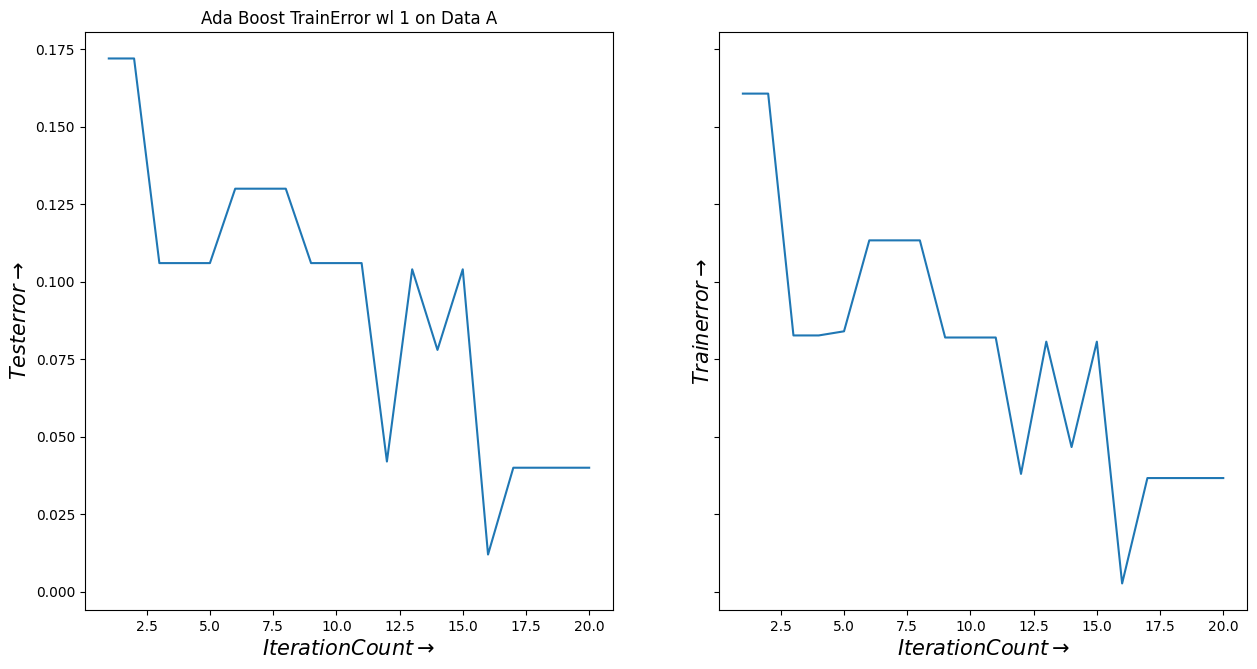

<Figure size 640x480 with 0 Axes>

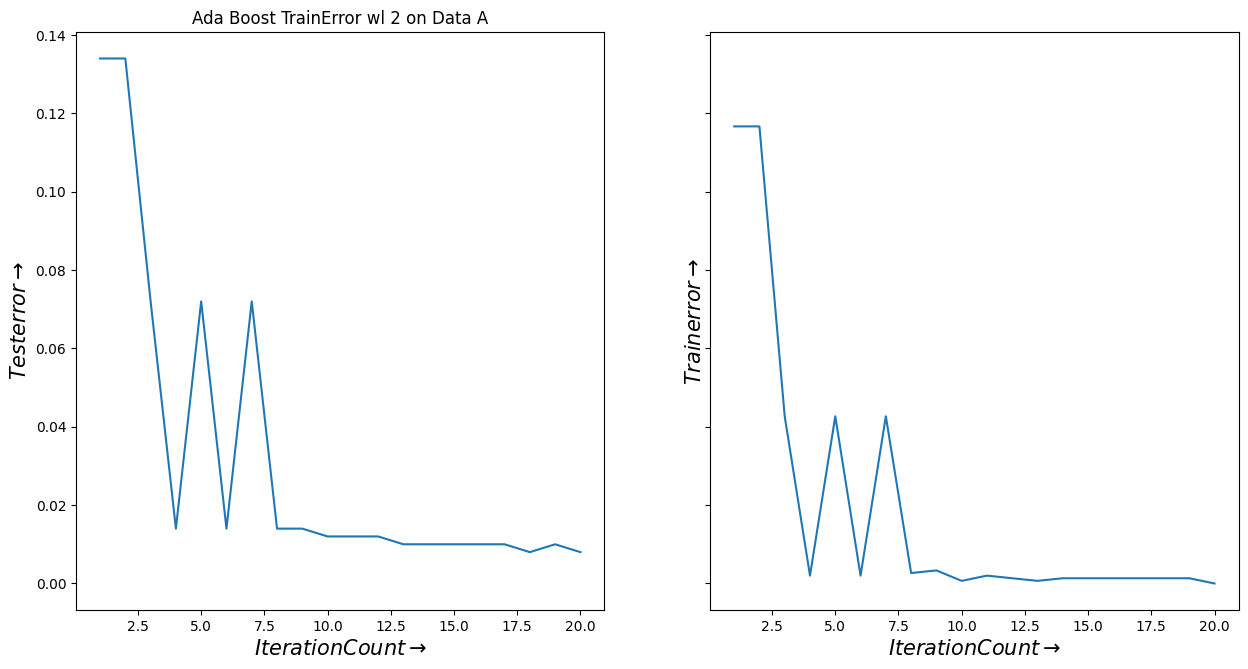

<Figure size 640x480 with 0 Axes>

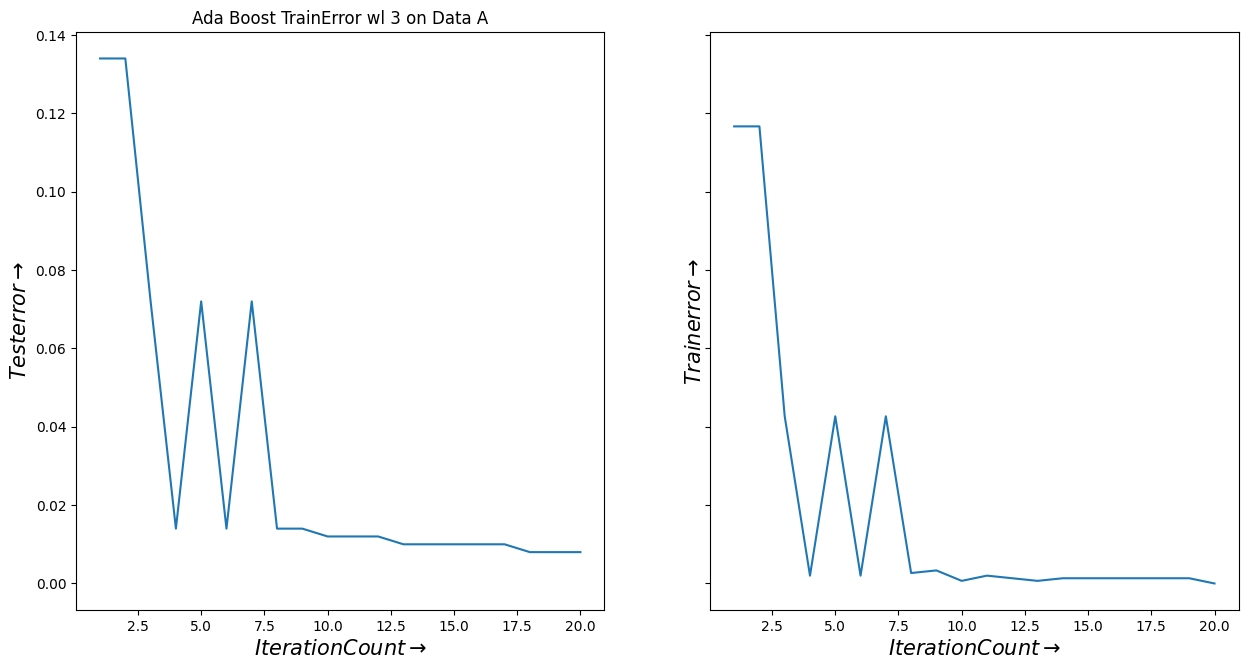

<Figure size 640x480 with 0 Axes>

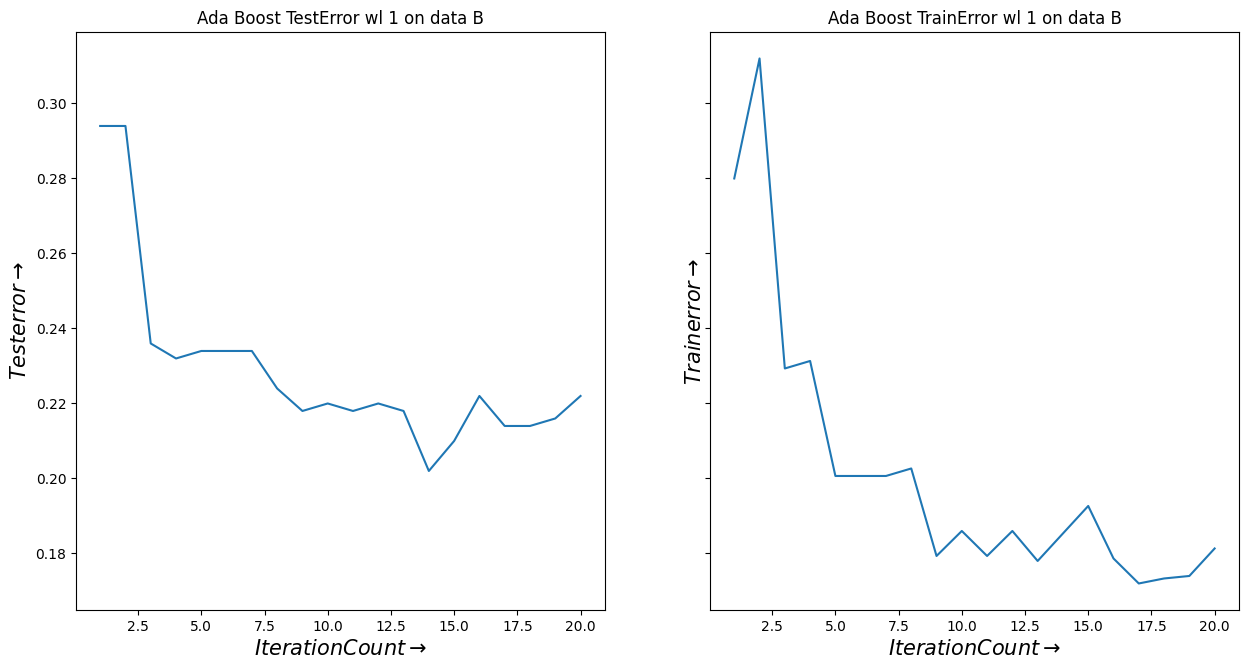

<Figure size 640x480 with 0 Axes>

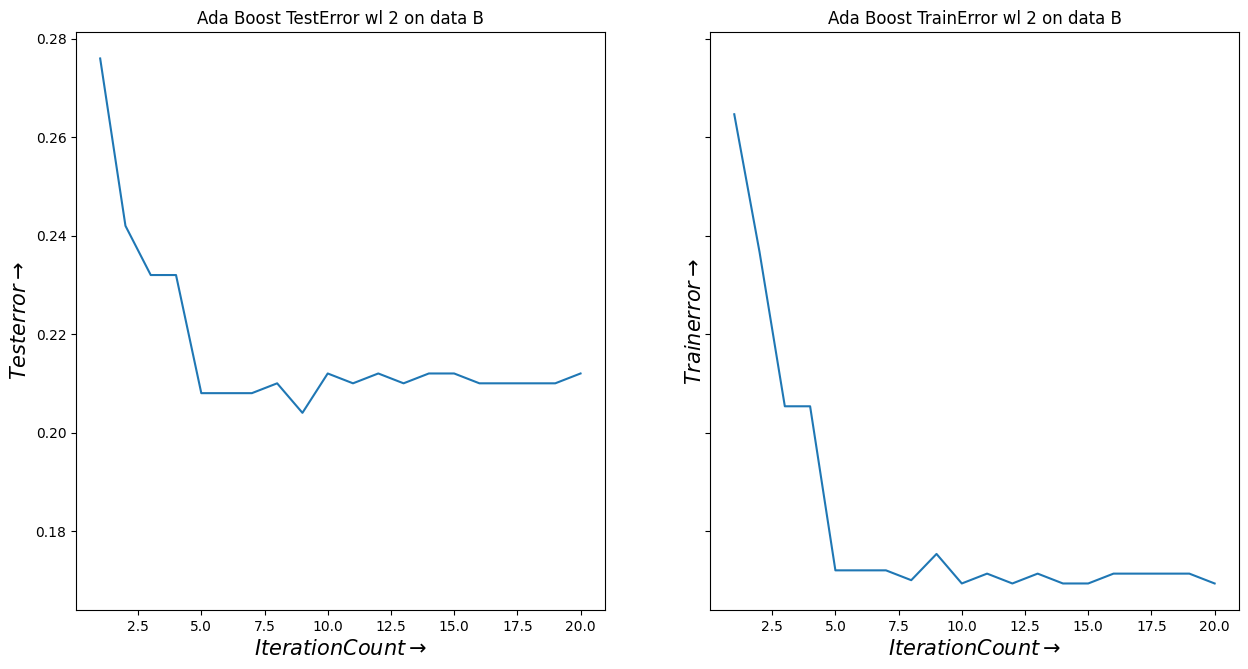

<Figure size 640x480 with 0 Axes>

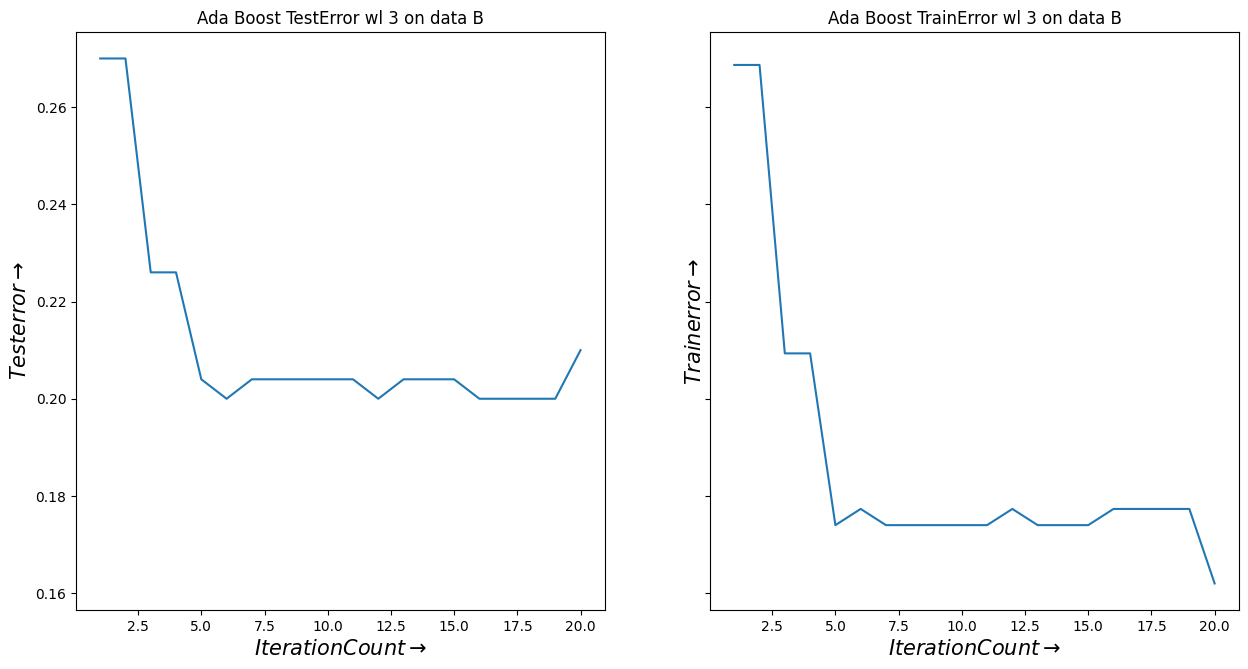

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

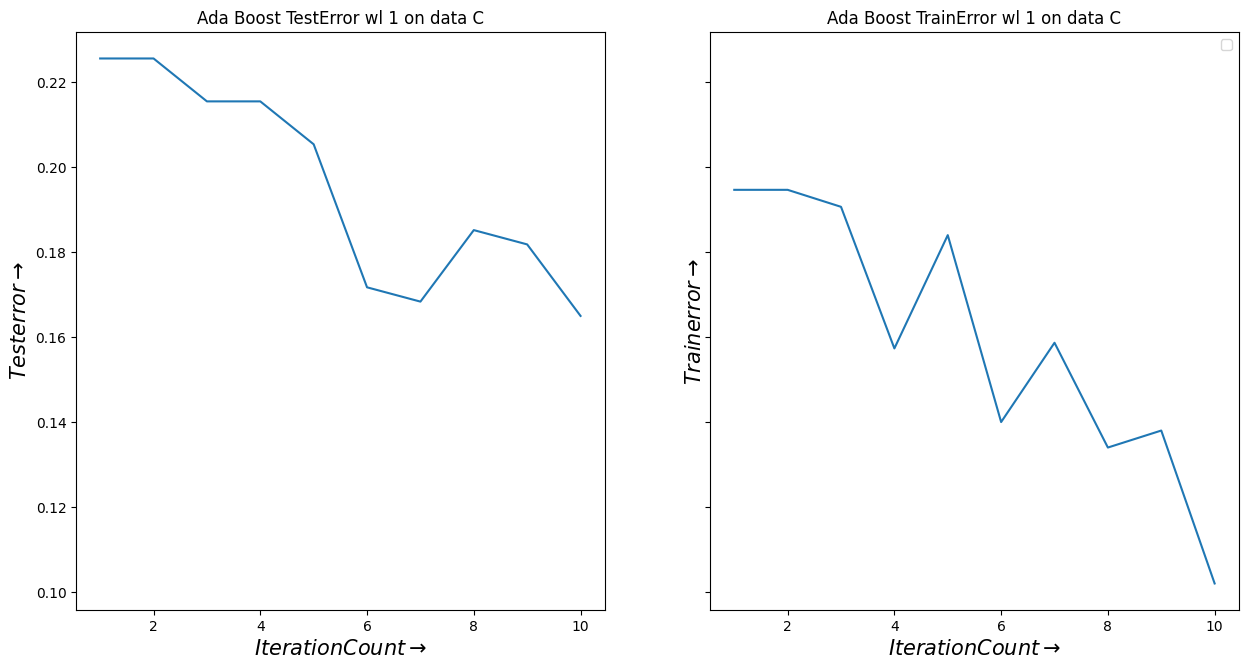

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

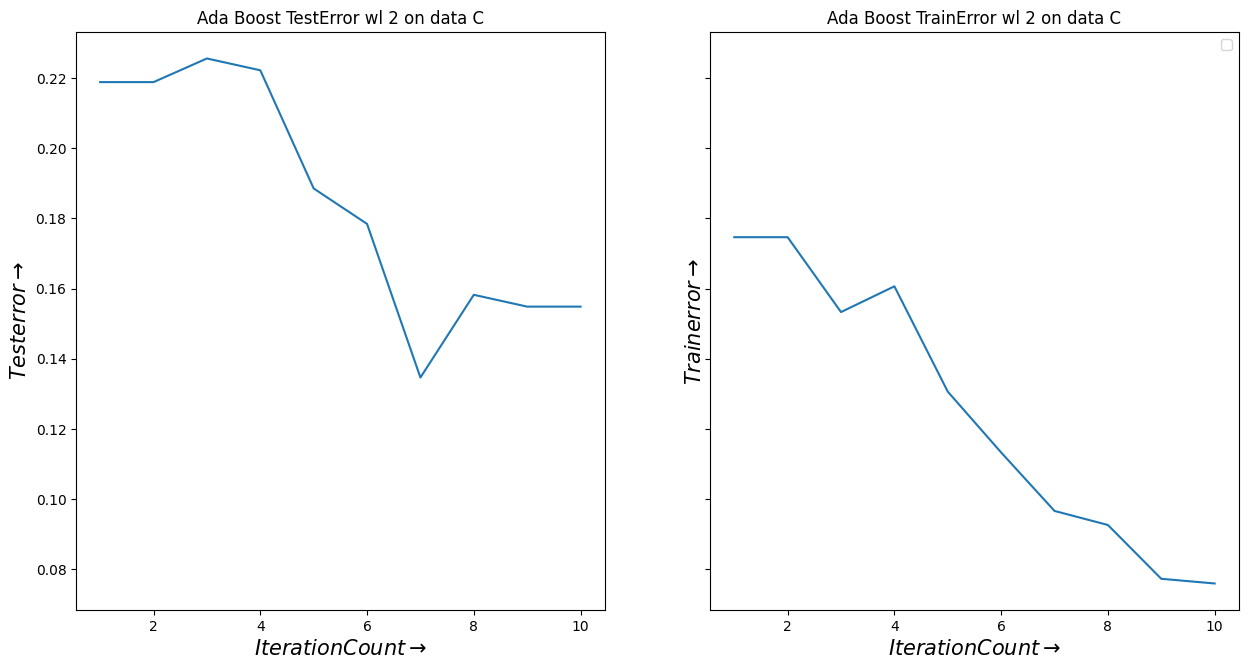

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

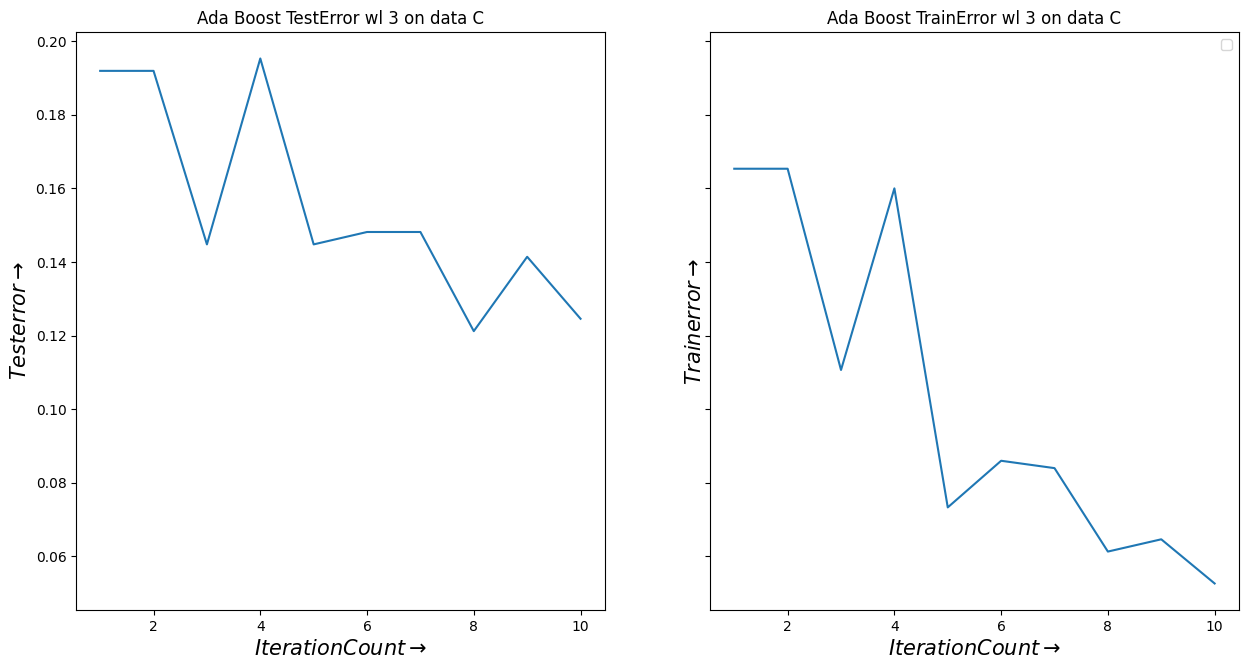

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

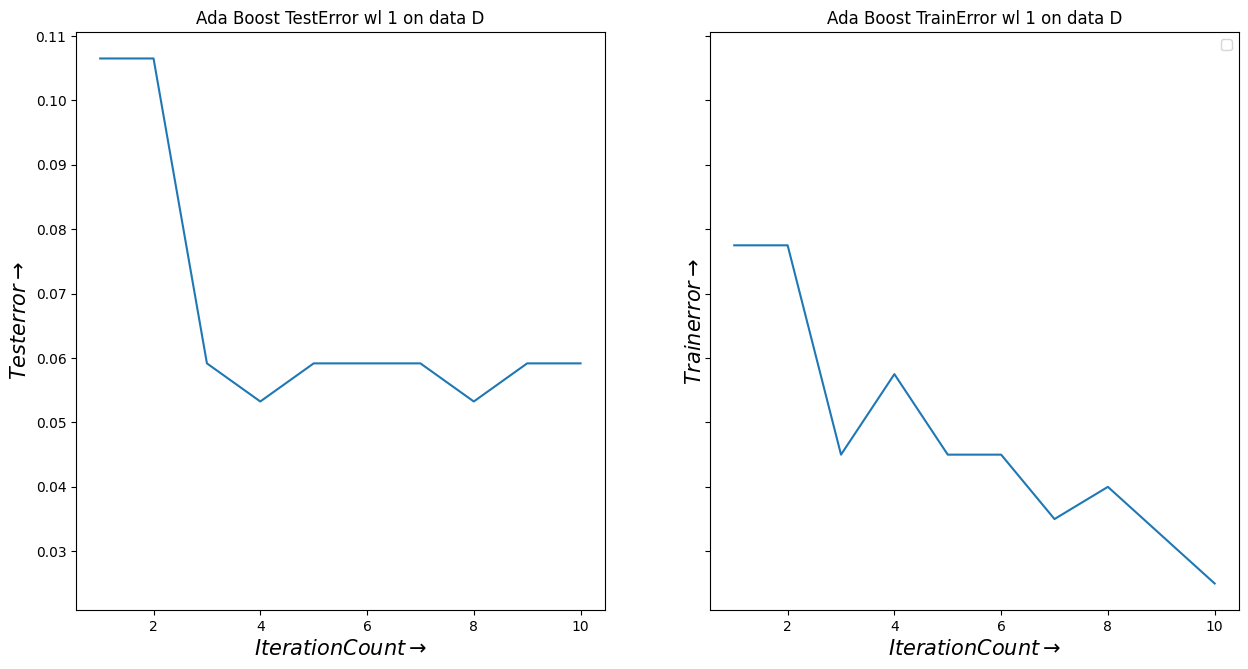

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

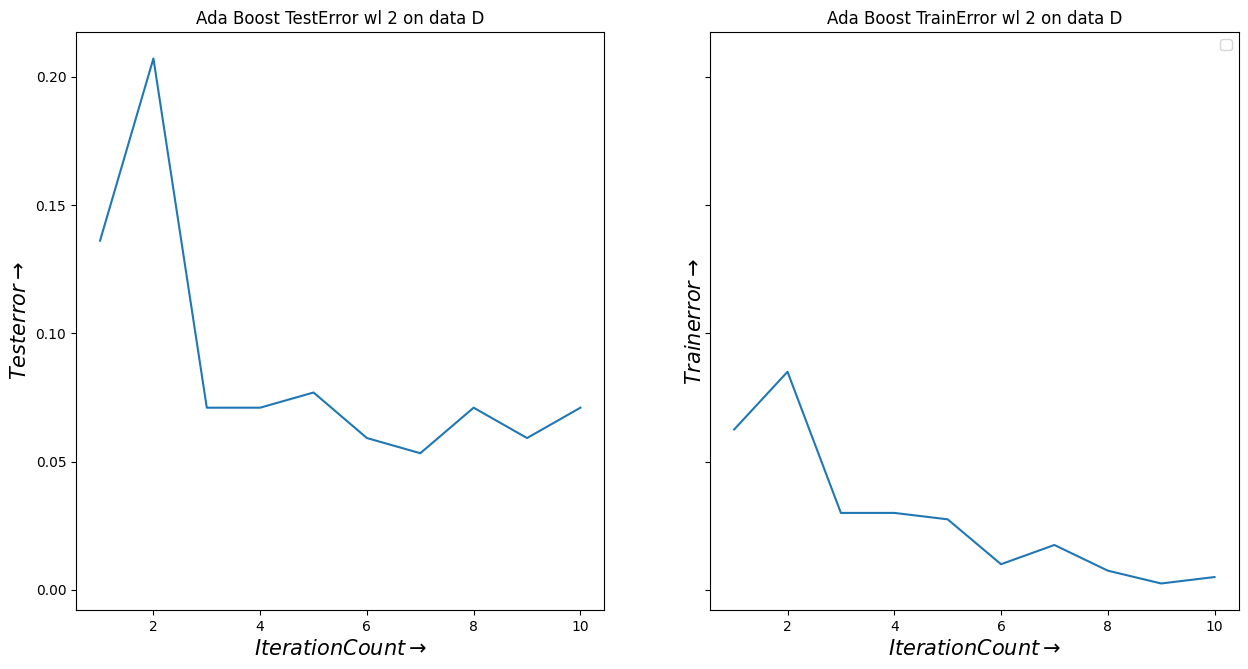

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

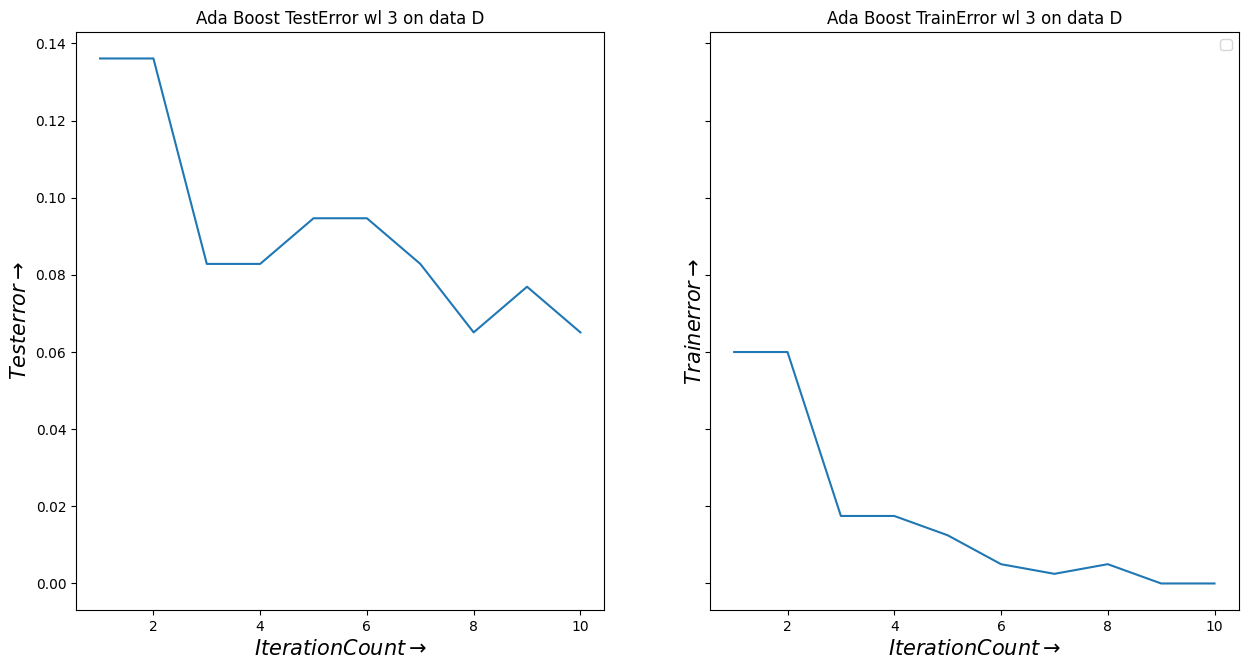

In [32]:
# Codewrite cell 
time = [i for i in range(1, 21)]
dataSet = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 3)
plt.figure(0)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a1)
subp1.set_title('Ada Boost TestError wl 1 on Data A')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b1)
subp1.set_title('Ada Boost TrainError wl 1 on Data A')
subp2.set_xlabel(r'$Iteration Count\rightarrow$', size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
plt.show()
plt.figure(1)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a2)
subp1.set_title('Ada Boost TestError wl 2 on Data A')
subp1.set_xlabel(r'$Iteration Count\rightarrow$', size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b2)
subp1.set_title('Ada Boost TrainError wl 2 on Data A')
subp2.set_xlabel(r'$Iteration Count\rightarrow$', size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
plt.show()
plt.figure(2)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a3)
subp1.set_title('Ada Boost TestError wl 3 on Data A')
subp1.set_xlabel(r'$Iteration Count\rightarrow$', size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b3)
subp1.set_title('Ada Boost TrainError wl 3 on Data A')
subp2.set_xlabel(r'$Iteration Count\rightarrow$', size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
plt.show()

dataSet = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 20, 3)
plt.figure(0)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a1)
subp1.set_title('Ada Boost TestError wl 1 on data B')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b1)
subp2.set_title('Ada Boost TrainError wl 1 on data B')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
plt.show()
plt.figure(1)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a2)
subp1.set_title('Ada Boost TestError wl 2 on data B')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b2)
subp2.set_title('Ada Boost TrainError wl 2 on data B')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
plt.show()
plt.figure(2)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a3)
subp1.set_title('Ada Boost TestError wl 3 on data B')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b3)
subp2.set_title('Ada Boost TrainError wl 3 on data B')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
plt.show()

dataSet = np.load('dataset_C.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
time = [1,2,3,4,5,6,7,8,9,10]
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)
plt.figure(0)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a1)
subp1.set_title('Ada Boost TestError wl 1 on data C')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b1)
subp2.set_title('Ada Boost TrainError wl 1 on data C')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
subp2.legend() 
plt.show()
plt.figure(1)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a2)
subp1.set_title('Ada Boost TestError wl 2 on data C')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b2)
subp2.set_title('Ada Boost TrainError wl 2 on data C')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
subp2.legend() 
plt.show()
plt.figure(2)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a3)
subp1.set_title('Ada Boost TestError wl 3 on data C')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b3)
subp2.set_title('Ada Boost TrainError wl 3 on data C')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
subp2.legend() 
plt.show()
dataSet = np.load('dataset_D.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
[a1, b1, y1] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 1)
[a2, b2, y2] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 2)
[a3, b3, y3] = adaboost(X_train, Y_train.reshape(-1,1), X_test, Y_test.reshape(-1,1), 10, 3)
plt.figure(0)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a1)
subp1.set_title('Ada Boost TestError wl 1 on data D')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b1)
subp2.set_title('Ada Boost TrainError wl 1 on data D')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
subp2.legend() 
plt.show()
plt.figure(1)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a2)
subp1.set_title('Ada Boost TestError wl 2 on data D')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b2)
subp2.set_title('Ada Boost TrainError wl 2 on data D')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
subp2.legend() 
plt.show()
plt.figure(2)
f, (subp1,subp2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))
subp1.plot(time, a3)
subp1.set_title('Ada Boost TestError wl 3 on data D')
subp1.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp1.set_ylabel(r'$Test Error\rightarrow$',size=15)
subp2.plot(time, b3)
subp2.set_title('Ada Boost TrainError wl 3 on data D')
subp2.set_xlabel(r'$Iteration Count\rightarrow$',size=15)
subp2.set_ylabel(r'$Train Error\rightarrow$',size=15)
subp2.legend() 
plt.show()

/var/folders/nl/1mt3vbv178l4wkfxkw9dfjq00000gn/T/ipykernel_33104/2790349343.py:184: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  error_test[t] = 1 - (len(Y_test[Y_test  ==  y_comb_test]))/len(Y_test)


<Figure size 640x480 with 0 Axes>

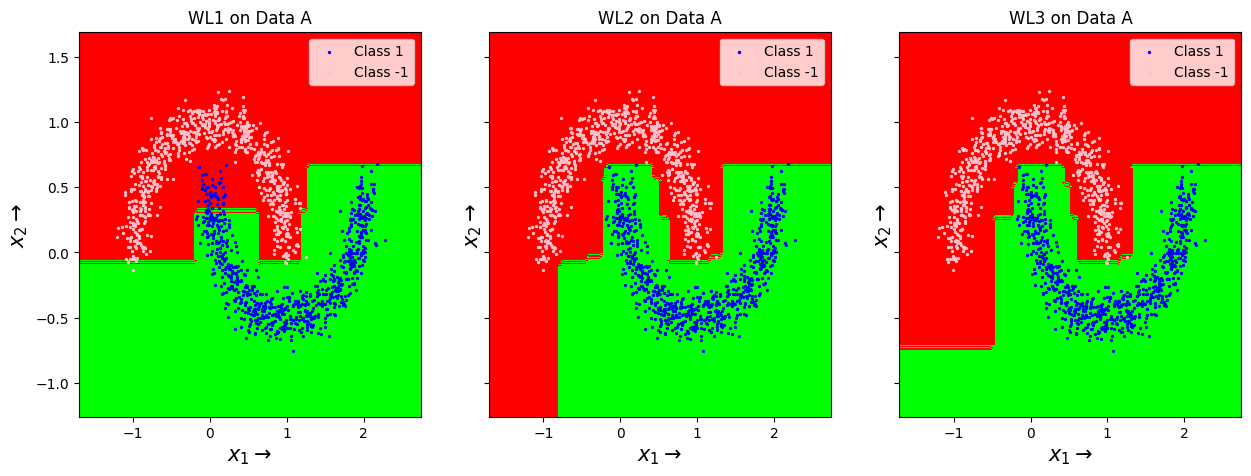

<Figure size 640x480 with 0 Axes>

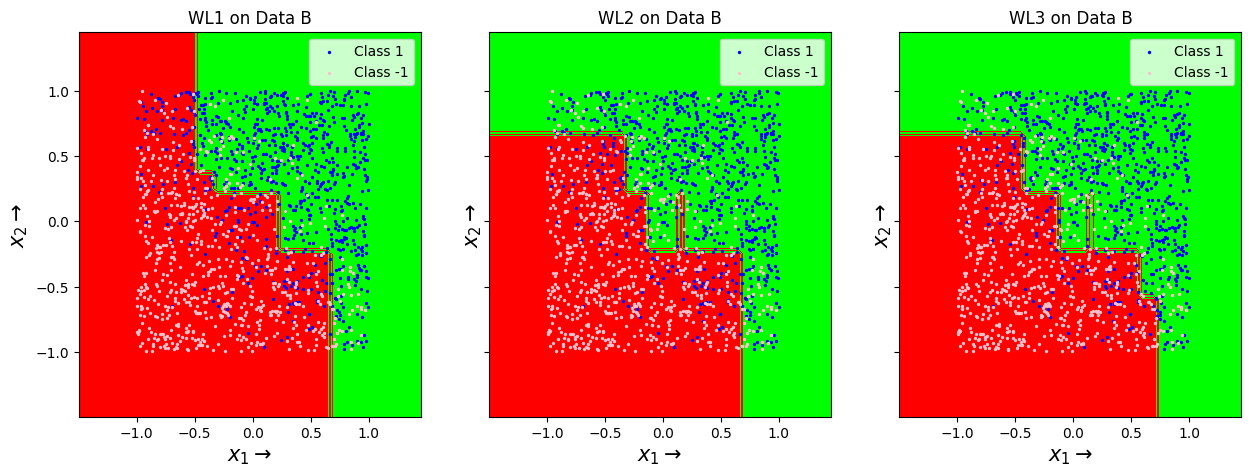

In [33]:
# Codewrite cell 
# Plots for illustrating the classifier here
dataSet = np.load('dataset_A.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
[a, b, y1] = adaboost(X_train, Y_train.reshape(-1,1), samples, Y_test.reshape(-1,1), 20, 1)
[a, b, y2] = adaboost(X_train, Y_train.reshape(-1,1), samples, Y_test.reshape(-1,1), 20, 2)
[a, b, y3] = adaboost(X_train, Y_train.reshape(-1,1), samples, Y_test.reshape(-1,1), 20, 3)
plt.figure(0)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
subp1.contourf(X,Y,y1.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp1.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp1.set_title('WL1 on Data A')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 

subp2.contourf(X,Y,y2.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp2.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp2.set_title('WL2 on Data A')
subp2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend() 


subp3.contourf(X,Y,y3.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp3.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp3.set_title('WL3 on Data A')
subp3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend() 
plt.show()

dataSet = np.load('dataset_B.npz')
X_train, Y_train, X_test, Y_test = dataSet['arr_0'],dataSet['arr_1'],dataSet['arr_2'],dataSet['arr_3']
minX = min(X_train[:,0]),min(X_train[:,1])
maxX = max(X_train[:,0]),max(X_train[:,1])
X,Y = np.meshgrid(np.arange(minX[0]-0.5,maxX[0]+0.5,0.05),np.arange(minX[1]-0.5,maxX[1]+0.5,0.05))
samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
[a, b, y1] = adaboost(X_train, Y_train.reshape(-1,1), samples, Y_test.reshape(-1,1), 10, 1)
[a, b, y2] = adaboost(X_train, Y_train.reshape(-1,1), samples, Y_test.reshape(-1,1), 20, 2)
[a, b, y3] = adaboost(X_train, Y_train.reshape(-1,1), samples, Y_test.reshape(-1,1), 20, 3)
plt.figure(1)
f, (subp1,subp2,subp3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
subp1.contourf(X,Y,y1.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp1.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp1.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp1.set_title('WL1 on Data B')
subp1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp1.legend() 
subp2.contourf(X,Y,y2.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp2.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp2.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp2.set_title('WL2 on Data B')
subp2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp2.legend() 

subp3.contourf(X,Y,y3.reshape(X.shape),colors=['#FF0000','#00FF00'])
subp3.scatter(X_train[Y_train == 1][:,0],X_train[Y_train == 1][:,1],s=2,c='#0000ff',label='Class 1')
subp3.scatter(X_train[Y_train == -1][:,0],X_train[Y_train == -1][:,1],s=2,c='#FFC0CB',label='Class -1')
subp3.set_title('WL3 on Data B')
subp3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
subp3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
subp3.legend() 
plt.show()


Textwrite cell: